##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE154826**

This dataset contains NSCLC data used by Merad (Maier 2020). GEO listing lists all sample as seperate file eg. GSE154826_amp_batch_ID_1.tar.gz

Files downloaded: 
* GSE154826_amp_batch_ID_10.tar.gz
* GSE154826_amp_batch_ID_11.tar.gz
* GSE154826_amp_batch_ID_14.tar.gz
* GSE154826_amp_batch_ID_15.tar.gz
* GSE154826_amp_batch_ID_16.tar.gz
* GSE154826_amp_batch_ID_17.tar.gz
* GSE154826_amp_batch_ID_18.tar.gz
* GSE154826_amp_batch_ID_19.tar.gz
* GSE154826_amp_batch_ID_1.tar.gz
* GSE154826_amp_batch_ID_22.tar.gz
* GSE154826_amp_batch_ID_230.tar.gz
* GSE154826_amp_batch_ID_231.tar.gz
* GSE154826_amp_batch_ID_23.tar.gz
* GSE154826_amp_batch_ID_244.tar.gz
* GSE154826_amp_batch_ID_245.tar.gz
* GSE154826_amp_batch_ID_24.tar.gz
* GSE154826_amp_batch_ID_25.tar.gz
* GSE154826_amp_batch_ID_26.tar.gz
* GSE154826_amp_batch_ID_27.tar.gz
* GSE154826_amp_batch_ID_28.tar.gz
* GSE154826_amp_batch_ID_292.tar.gz
* GSE154826_amp_batch_ID_293.tar.gz
* GSE154826_amp_batch_ID_29.tar.gz
* GSE154826_amp_batch_ID_2.tar.gz
* GSE154826_amp_batch_ID_307.tar.gz
* GSE154826_amp_batch_ID_308.tar.gz
* GSE154826_amp_batch_ID_309.tar.gz
* GSE154826_amp_batch_ID_30.tar.gz
* GSE154826_amp_batch_ID_31.tar.gz
* GSE154826_amp_batch_ID_32.tar.gz
* GSE154826_amp_batch_ID_33.tar.gz
* GSE154826_amp_batch_ID_342.tar.gz
* GSE154826_amp_batch_ID_343.tar.gz
* GSE154826_amp_batch_ID_344.tar.gz
* GSE154826_amp_batch_ID_345.tar.gz
* GSE154826_amp_batch_ID_346.tar.gz
* GSE154826_amp_batch_ID_347.tar.gz
* GSE154826_amp_batch_ID_348.tar.gz
* GSE154826_amp_batch_ID_350.tar.gz
* GSE154826_amp_batch_ID_351.tar.gz
* GSE154826_amp_batch_ID_36.tar.gz
* GSE154826_amp_batch_ID_37.tar.gz
* GSE154826_amp_batch_ID_38.tar.gz
* GSE154826_amp_batch_ID_39.tar.gz
* GSE154826_amp_batch_ID_3.tar.gz
* GSE154826_amp_batch_ID_40.tar.gz
* GSE154826_amp_batch_ID_41.tar.gz
* GSE154826_amp_batch_ID_42.tar.gz
* GSE154826_amp_batch_ID_43.tar.gz
* GSE154826_amp_batch_ID_44.tar.gz
* GSE154826_amp_batch_ID_45.tar.gz
* GSE154826_amp_batch_ID_46.tar.gz
* GSE154826_amp_batch_ID_47.tar.gz
* GSE154826_amp_batch_ID_48.tar.gz
* GSE154826_amp_batch_ID_49.tar.gz
* GSE154826_amp_batch_ID_4.tar.gz
* GSE154826_amp_batch_ID_50.tar.gz
* GSE154826_amp_batch_ID_51.tar.gz
* GSE154826_amp_batch_ID_52.tar.gz
* GSE154826_amp_batch_ID_53.tar.gz
* GSE154826_amp_batch_ID_54.tar.gz
* GSE154826_amp_batch_ID_55.tar.gz
* GSE154826_amp_batch_ID_56.tar.gz
* GSE154826_amp_batch_ID_5.tar.gz
* GSE154826_amp_batch_ID_668.tar.gz
* GSE154826_amp_batch_ID_6.tar.gz
* GSE154826_amp_batch_ID_7.tar.gz
* GSE154826_amp_batch_ID_88.tar.gz
* GSE154826_amp_batch_ID_89.tar.gz
* GSE154826_amp_batch_ID_8.tar.gz
* GSE154826_amp_batch_ID_90.tar.gz
* GSE154826_amp_batch_ID_91.tar.gz
* GSE154826_amp_batch_ID_92.tar.gz
* GSE154826_amp_batch_ID_93.tar.gz
* GSE154826_amp_batch_ID_94.tar.gz
* GSE154826_amp_batch_ID_95.tar.gz
* GSE154826_amp_batch_ID_9.tar.gz
* GSE154826_sample_annots.csv.gz

There were individually downloaded using their ftp links and then unzipped using tar -xvf

This gives the following files per downloaded sample: 
* 1_patient_370-normal_370_features.tsv
* 1_patient_370-normal_370_barcodes.tsv
* 1_patient_370-normal_370_matrix.mtx

Organised in to correct folders/ file names and then gzipped all files in folder with gzip -r

A number of samples were excluded (moved to excluding folder) as either insufficient naming to tell if normal or tumour sample, or because they were sorted to T cells. 




In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE154826')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE154826"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
D1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/1_P370_N") 
D2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/2_P370_T") 
D3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/3_P371_N") 
D4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/4_P371_T") 
D5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/5_P377_N") 
D6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/6_P377_T") 
D7.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/7_P378_N") 
D8.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/8_P378_T") 
D9.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/9_P393-178") 
D10.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/10_P403_N") 
D11.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/11_P403_T") 
D14.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/14_P406_N") 
D15.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/15_P406_T") 
D16.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/16_P408_N") 
D17.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/17_P408_T") 
D18.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/18_P410_N") 
D19.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/19_P410_T") 
D22.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/22_P458_N") 
D23.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/23_P458_T") 
D24.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/24_P460_N") 
D25.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/25_P460_T") 
D26.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/26_P464_N") 
D27.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/27_P464_T") 
D28.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/28_P514_N") 
D29.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/29_P514_T") 
D30.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/30_P522_BM174N") 
D31.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/31_P522_BM174T") 
D32.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/32_P532_N") 
D33.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/33_P532_T") 
D36.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/36_P558_T") 
D37.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/37_P564_N") 
D38.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/38_P564_T") 
D39.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/39_P569_N") 
D40.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/40_P569_T") 
D41.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/41_P570_N") 
D42.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/42_P570_T") 
D43.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/43_P571_T") 
D44.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/44_P572_N") 
D45.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/45_P572_T") 
D46.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/46_P578_N") 
D47.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/47_P578_T") 
D49.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/49_P581_N") 
D50.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/50_P581_T") 
D230.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/230_P338_Lib39") 
D231.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/231_P338_lib40") 
D292.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/292_P714_T") 
D293.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/293_P714_N") 
D307.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/307_P729_IN190329") 
D308.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/308_P729_IT190329") 
D309.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/309_P725_HS190415l") 
D668.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE154826/668_P800_800T1_0_G") 

In [5]:
names(D1.data) 
names(D2.data) 
names(D3.data) 
names(D4.data) 
names(D5.data) 
names(D6.data) 
names(D7.data) 
names(D8.data) 
names(D9.data) 
names(D10.data)  
names(D11.data)  
names(D14.data)  
names(D15.data)  
names(D16.data)  
names(D17.data)  
names(D18.data)  
names(D19.data)  
names(D22.data)  
names(D23.data)  
names(D24.data)  
names(D25.data)  
names(D26.data)  
names(D27.data)  
names(D28.data)  
names(D29.data)  
names(D30.data)  
names(D31.data) 
names(D32.data)  
names(D33.data)  
names(D36.data)  
names(D37.data)  
names(D38.data)  
names(D39.data)  
names(D40.data)  
names(D41.data)  
names(D42.data)  
names(D43.data)  
names(D44.data)  
names(D45.data)  
names(D46.data)  
names(D47.data)  
names(D49.data)  
names(D50.data)  
names(D230.data)  
names(D231.data) 
names(D292.data)
names(D293.data)
names(D307.data) 
names(D308.data)
names(D309.data) 
names(D668.data)

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

In [6]:
head(colnames(D1.data))
head(colnames(D231.data))

[1] "AAACCTGAGAAACCAT-1" "AAACCTGAGAAACCGC-1" "AAACCTGAGAAACCTA-1"
[4] "AAACCTGAGAAACGAG-1" "AAACCTGAGAAACGCC-1" "AAACCTGAGAAAGTGG-1"

[1] "AAACATACAAAACG-1" "AAACATACAAAAGC-1" "AAACATACAAACAG-1" "AAACATACAAACGA-1"
[5] "AAACATACAAAGCA-1" "AAACATACAAAGTG-1"

In [7]:
#Add dataset info to colnames
colnames(D1.data) <- paste0("GSE154826_D1_", colnames(D1.data)) 
colnames(D2.data) <- paste0("GSE154826_D2_", colnames(D2.data)) 
colnames(D3.data) <- paste0("GSE154826_D3_", colnames(D3.data)) 
colnames(D4.data) <- paste0("GSE154826_D4_", colnames(D4.data)) 
colnames(D5.data) <- paste0("GSE154826_D5_", colnames(D5.data)) 
colnames(D6.data) <- paste0("GSE154826_D6_", colnames(D6.data)) 
colnames(D7.data) <- paste0("GSE154826_D7_", colnames(D7.data)) 
colnames(D8.data) <- paste0("GSE154826_D8_", colnames(D8.data)) 
colnames(D9.data) <- paste0("GSE154826_D9_", colnames(D9.data)) 
colnames(D10.data) <- paste0("GSE154826_D10_", colnames(D10.data))  
colnames(D11.data) <- paste0("GSE154826_D11_", colnames(D11.data))  
colnames(D14.data) <- paste0("GSE154826_D14_", colnames(D14.data))  
colnames(D15.data) <- paste0("GSE154826_D15_", colnames(D15.data))  
colnames(D16.data) <- paste0("GSE154826_D16_", colnames(D16.data))  
colnames(D17.data) <- paste0("GSE154826_D17_", colnames(D17.data))  
colnames(D18.data) <- paste0("GSE154826_D18_", colnames(D18.data))  
colnames(D19.data) <- paste0("GSE154826_D19_", colnames(D19.data))  
colnames(D22.data) <- paste0("GSE154826_D22_", colnames(D22.data))  
colnames(D23.data) <- paste0("GSE154826_D23_", colnames(D23.data))  
colnames(D24.data) <- paste0("GSE154826_D24_", colnames(D24.data))  
colnames(D25.data) <- paste0("GSE154826_D25_", colnames(D25.data))  
colnames(D26.data) <- paste0("GSE154826_D26_", colnames(D26.data))  
colnames(D27.data) <- paste0("GSE154826_D27_", colnames(D27.data))  
colnames(D28.data) <- paste0("GSE154826_D28_", colnames(D28.data))  
colnames(D29.data) <- paste0("GSE154826_D29_", colnames(D29.data))  
colnames(D30.data) <- paste0("GSE154826_D30_", colnames(D30.data))  
colnames(D31.data) <- paste0("GSE154826_D31_", colnames(D31.data)) 
colnames(D32.data) <- paste0("GSE154826_D32_", colnames(D32.data))  
colnames(D33.data) <- paste0("GSE154826_D33_", colnames(D33.data))  
colnames(D36.data) <- paste0("GSE154826_D36_", colnames(D36.data))  
colnames(D37.data) <- paste0("GSE154826_D37_", colnames(D37.data))  
colnames(D38.data) <- paste0("GSE154826_D38_", colnames(D38.data))  
colnames(D39.data) <- paste0("GSE154826_D39_", colnames(D39.data))  
colnames(D40.data) <- paste0("GSE154826_D40_", colnames(D40.data))  
colnames(D41.data) <- paste0("GSE154826_D41_", colnames(D41.data))  
colnames(D42.data) <- paste0("GSE154826_D42_", colnames(D42.data))  
colnames(D43.data) <- paste0("GSE154826_D43_", colnames(D43.data))  
colnames(D44.data) <- paste0("GSE154826_D44_", colnames(D44.data))  
colnames(D45.data) <- paste0("GSE154826_D45_", colnames(D45.data))  
colnames(D46.data) <- paste0("GSE154826_D46_", colnames(D46.data))  
colnames(D47.data) <- paste0("GSE154826_D47_", colnames(D47.data))  
colnames(D49.data) <- paste0("GSE154826_D49_", colnames(D49.data))  
colnames(D50.data) <- paste0("GSE154826_D50_", colnames(D50.data))  
colnames(D230.data) <- paste0("GSE154826_D230_", colnames(D230.data))  
colnames(D231.data) <- paste0("GSE154826_D231_", colnames(D231.data)) 
colnames(D292.data) <- paste0("GSE154826_D292_", colnames(D292.data))
colnames(D293.data) <- paste0("GSE154826_D293_", colnames(D293.data))
colnames(D307.data) <- paste0("GSE154826_D307_", colnames(D307.data)) 
colnames(D308.data) <- paste0("GSE154826_D308_", colnames(D308.data))
colnames(D309.data) <- paste0("GSE154826_D309_", colnames(D309.data)) 
colnames(D668.data) <- paste0("GSE154826_D668_", colnames(D668.data))

In [8]:
head(colnames(D9.data))
head(colnames(D41.data))

[1] "GSE154826_D9_AAACCTGAGAAACCAT-1" "GSE154826_D9_AAACCTGAGAAACCGC-1"
[3] "GSE154826_D9_AAACCTGAGAAACCTA-1" "GSE154826_D9_AAACCTGAGAAACGAG-1"
[5] "GSE154826_D9_AAACCTGAGAAACGCC-1" "GSE154826_D9_AAACCTGAGAAAGTGG-1"

[1] "GSE154826_D41_AAACCTGAGAAACCAT-1" "GSE154826_D41_AAACCTGAGAAACCGC-1"
[3] "GSE154826_D41_AAACCTGAGAAACCTA-1" "GSE154826_D41_AAACCTGAGAAACGAG-1"
[5] "GSE154826_D41_AAACCTGAGAAACGCC-1" "GSE154826_D41_AAACCTGAGAAAGTGG-1"

In [10]:
#create seperate seurat object for each sample
D1 <- CreateSeuratObject(counts = D1.data, project = "GSE154826", min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [9]:
#create seperate seurat object for each sample
D2 <- CreateSeuratObject(counts = D2.data, project = "GSE154826", min.features = 200)
D3 <- CreateSeuratObject(counts = D3.data, project = "GSE154826", min.features = 200)
D4 <- CreateSeuratObject(counts = D4.data, project = "GSE154826", min.features = 200)
D5 <- CreateSeuratObject(counts = D5.data, project = "GSE154826", min.features = 200)
D6 <- CreateSeuratObject(counts = D6.data, project = "GSE154826", min.features = 200)
D7 <- CreateSeuratObject(counts = D7.data, project = "GSE154826", min.features = 200)
D8 <- CreateSeuratObject(counts = D8.data, project = "GSE154826", min.features = 200)
D9 <- CreateSeuratObject(counts = D9.data, project = "GSE154826", min.features = 200)
D10 <- CreateSeuratObject(counts = D10.data, project = "GSE154826", min.features = 200)
D11 <- CreateSeuratObject(counts = D11.data, project = "GSE154826", min.features = 200)  
D14 <- CreateSeuratObject(counts = D14.data, project = "GSE154826", min.features = 200)
D15 <- CreateSeuratObject(counts = D15.data, project = "GSE154826", min.features = 200)
D16 <- CreateSeuratObject(counts = D16.data, project = "GSE154826", min.features = 200)
D17 <- CreateSeuratObject(counts = D17.data, project = "GSE154826", min.features = 200)
D18 <- CreateSeuratObject(counts = D18.data, project = "GSE154826", min.features = 200)
D19 <- CreateSeuratObject(counts = D19.data, project = "GSE154826", min.features = 200)
D22 <- CreateSeuratObject(counts = D22.data, project = "GSE154826", min.features = 200)
D23 <- CreateSeuratObject(counts = D23.data, project = "GSE154826", min.features = 200)
D24 <- CreateSeuratObject(counts = D24.data, project = "GSE154826", min.features = 200)
D25 <- CreateSeuratObject(counts = D25.data, project = "GSE154826", min.features = 200)
D26 <- CreateSeuratObject(counts = D26.data, project = "GSE154826", min.features = 200)
D27 <- CreateSeuratObject(counts = D27.data, project = "GSE154826", min.features = 200)
D28 <- CreateSeuratObject(counts = D28.data, project = "GSE154826", min.features = 200)
D29 <- CreateSeuratObject(counts = D29.data, project = "GSE154826", min.features = 200)
D30 <- CreateSeuratObject(counts = D30.data, project = "GSE154826", min.features = 200)
D31 <- CreateSeuratObject(counts = D31.data, project = "GSE154826", min.features = 200)
D32 <- CreateSeuratObject(counts = D32.data, project = "GSE154826", min.features = 200)
D33 <- CreateSeuratObject(counts = D33.data, project = "GSE154826", min.features = 200)
D36 <- CreateSeuratObject(counts = D36.data, project = "GSE154826", min.features = 200)
D37 <- CreateSeuratObject(counts = D37.data, project = "GSE154826", min.features = 200)
D38 <- CreateSeuratObject(counts = D38.data, project = "GSE154826", min.features = 200)
D39 <- CreateSeuratObject(counts = D39.data, project = "GSE154826", min.features = 200)
D40 <- CreateSeuratObject(counts = D40.data, project = "GSE154826", min.features = 200)
D41 <- CreateSeuratObject(counts = D41.data, project = "GSE154826", min.features = 200)
D42 <- CreateSeuratObject(counts = D42.data, project = "GSE154826", min.features = 200)
D43 <- CreateSeuratObject(counts = D43.data, project = "GSE154826", min.features = 200)
D44 <- CreateSeuratObject(counts = D44.data, project = "GSE154826", min.features = 200)
D45 <- CreateSeuratObject(counts = D45.data, project = "GSE154826", min.features = 200)
D46 <- CreateSeuratObject(counts = D46.data, project = "GSE154826", min.features = 200)
D47 <- CreateSeuratObject(counts = D47.data, project = "GSE154826", min.features = 200)
D49 <- CreateSeuratObject(counts = D49.data, project = "GSE154826", min.features = 200)
D50 <- CreateSeuratObject(counts = D50.data, project = "GSE154826", min.features = 200)
D230 <- CreateSeuratObject(counts = D230.data, project = "GSE154826", min.features = 200)
D231 <- CreateSeuratObject(counts = D231.data, project = "GSE154826", min.features = 200)
D292 <- CreateSeuratObject(counts = D292.data, project = "GSE154826", min.features = 200)
D293 <- CreateSeuratObject(counts = D293.data, project = "GSE154826", min.features = 200)
D307 <- CreateSeuratObject(counts = D307.data, project = "GSE154826", min.features = 200)
D308 <- CreateSeuratObject(counts = D308.data, project = "GSE154826", min.features = 200)
D309 <- CreateSeuratObject(counts = D309.data, project = "GSE154826", min.features = 200)
D668 <- CreateSeuratObject(counts = D668.data, project = "GSE154826", min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with da

In [11]:
#add metadata to sample
D1@meta.data$sample_type <- "Healthy Lung"
D1@meta.data$cancer_type <- "Healthy"
D1@meta.data$patient_id <- "p370"
D1@meta.data$sample_id <- "GSE154826_Healthy_p370"
D1@meta.data$site <- "lung"
D1@meta.data$cancer_subtype <- "NA"
D1@meta.data$sample_type_major <- "healthy"
D1@meta.data$integration_id <- D1@meta.data$sample_id

#add metadata to sample
D2@meta.data$sample_type <- "tumour"
D2@meta.data$cancer_type <- "LUAD"
D2@meta.data$patient_id <- "p370"
D2@meta.data$sample_id <- "GSE154826_NSCLC_p370"
D2@meta.data$site <- "lung"
D2@meta.data$cancer_subtype <- "NSCLC"
D2@meta.data$sample_type_major <- "primary tumour"
D2@meta.data$integration_id <- D2@meta.data$sample_id

#add metadata to sample
D3@meta.data$sample_type <- "Healthy Lung"
D3@meta.data$cancer_type <- "Healthy"
D3@meta.data$patient_id <- "p371"
D3@meta.data$sample_id <- "GSE154826_Healthy_p371"
D3@meta.data$site <- "lung"
D3@meta.data$cancer_subtype <- "NA"
D3@meta.data$sample_type_major <- "healthy"
D3@meta.data$integration_id <- D3@meta.data$sample_id

#add metadata to sample
D4@meta.data$sample_type <- "tumour"
D4@meta.data$cancer_type <- "LUAD"
D4@meta.data$patient_id <- "p371"
D4@meta.data$sample_id <- "GSE154826_NSCLC_p371"
D4@meta.data$site <- "lung"
D4@meta.data$cancer_subtype <- "LUAD"
D4@meta.data$sample_type_major <- "primary tumour"
D4@meta.data$integration_id <- D4@meta.data$sample_id

#add metadata to sample
D5@meta.data$sample_type <- "Healthy Lung"
D5@meta.data$cancer_type <- "Healthy"
D5@meta.data$patient_id <- "p377"
D5@meta.data$sample_id <- "GSE154826_Healthy_p377"
D5@meta.data$site <- "lung"
D5@meta.data$cancer_subtype <- "NA"
D5@meta.data$sample_type_major <- "healthy"
D5@meta.data$integration_id <- D5@meta.data$sample_id

#add metadata to sample
D6@meta.data$sample_type <- "tumour"
D6@meta.data$cancer_type <- "LUSC"
D6@meta.data$patient_id <- "p377"
D6@meta.data$sample_id <- "GSE154826_NSCLC_p377"
D6@meta.data$site <- "lung"
D6@meta.data$cancer_subtype <- "NSCLC"
D6@meta.data$sample_type_major <- "primary tumour"
D6@meta.data$integration_id <- D6@meta.data$sample_id

#add metadata to sample
D7@meta.data$sample_type <- "Healthy Lung"
D7@meta.data$cancer_type <- "Healthy"
D7@meta.data$patient_id <- "p378"
D7@meta.data$sample_id <- "GSE154826_Healthy_p378"
D7@meta.data$site <- "lung"
D7@meta.data$cancer_subtype <- "NA"
D7@meta.data$sample_type_major <- "healthy"
D7@meta.data$integration_id <- D7@meta.data$sample_id

#add metadata to sample
D8@meta.data$sample_type <- "tumour"
D8@meta.data$cancer_type <- "LUAD"
D8@meta.data$patient_id <- "p378"
D8@meta.data$sample_id <- "GSE154826_NSCLC_p378"
D8@meta.data$site <- "lung"
D8@meta.data$cancer_subtype <- "NSCLC"
D8@meta.data$sample_type_major <- "primary tumour"
D8@meta.data$integration_id <- D8@meta.data$sample_id

#add metadata to sample
D9@meta.data$sample_type <- "tumour"
D9@meta.data$cancer_type <- "LUAD"
D9@meta.data$patient_id <- "p393"
D9@meta.data$sample_id <- "GSE154826_NSCLC_p393"
D9@meta.data$site <- "lung"
D9@meta.data$cancer_subtype <- "NSCLC"
D9@meta.data$sample_type_major <- "primary tumour"
D9@meta.data$integration_id <- D9@meta.data$sample_id

#add metadata to sample
D10@meta.data$sample_type <- "Healthy Lung"
D10@meta.data$cancer_type <- "Healthy"
D10@meta.data$patient_id <- "p403"
D10@meta.data$sample_id <- "GSE154826_Healthy_p403"
D10@meta.data$site <- "lung"
D10@meta.data$cancer_subtype <- "NA"
D10@meta.data$sample_type_major <- "healthy"
D10@meta.data$integration_id <- D10@meta.data$sample_id

#add metadata to sample
D11@meta.data$sample_type <- "tumour"
D11@meta.data$cancer_type <- "LUAD"
D11@meta.data$patient_id <- "p403"
D11@meta.data$sample_id <- "GSE154826_NSCLC_p403"
D11@meta.data$site <- "lung"
D11@meta.data$cancer_subtype <- "NSCLC"
D11@meta.data$sample_type_major <- "primary tumour"
D11@meta.data$integration_id <- D11@meta.data$sample_id

#add metadata to sample
D14@meta.data$sample_type <- "Healthy Lung"
D14@meta.data$cancer_type <- "Healthy"
D14@meta.data$patient_id <- "p406"
D14@meta.data$sample_id <- "GSE154826_Healthy_p406"
D14@meta.data$site <- "lung"
D14@meta.data$cancer_subtype <- "NA"
D14@meta.data$sample_type_major <- "healthy"
D14@meta.data$integration_id <- D14@meta.data$sample_id

#add metadata to sample
D15@meta.data$sample_type <- "tumour"
D15@meta.data$cancer_type <- "LUAD"
D15@meta.data$patient_id <- "p406"
D15@meta.data$sample_id <- "GSE154826_NSCLC_p406"
D15@meta.data$site <- "lung"
D15@meta.data$cancer_subtype <- "NSCLC"
D15@meta.data$sample_type_major <- "primary tumour"
D15@meta.data$integration_id <- D15@meta.data$sample_id

#add metadata to sample
D16@meta.data$sample_type <- "Healthy Lung"
D16@meta.data$cancer_type <- "Healthy"
D16@meta.data$patient_id <- "p408"
D16@meta.data$sample_id <- "GSE154826_Healthy_p408"
D16@meta.data$site <- "lung"
D16@meta.data$cancer_subtype <- "NA"
D16@meta.data$sample_type_major <- "healthy"
D16@meta.data$integration_id <- D16@meta.data$sample_id

#add metadata to sample
D17@meta.data$sample_type <- "tumour"
D17@meta.data$cancer_type <- "LUAD"
D17@meta.data$patient_id <- "p408"
D17@meta.data$sample_id <- "GSE154826_NSCLC_p408"
D17@meta.data$site <- "lung"
D17@meta.data$cancer_subtype <- "NSCLC"
D17@meta.data$sample_type_major <- "primary tumour"
D17@meta.data$integration_id <- D17@meta.data$sample_id

#add metadata to sample
D18@meta.data$sample_type <- "Healthy Lung"
D18@meta.data$cancer_type <- "Healthy"
D18@meta.data$patient_id <- "p410"
D18@meta.data$sample_id <- "GSE154826_Healthy_p410"
D18@meta.data$site <- "lung"
D18@meta.data$cancer_subtype <- "NA"
D18@meta.data$sample_type_major <- "healthy"
D18@meta.data$integration_id <- D18@meta.data$sample_id

#add metadata to sample
D19@meta.data$sample_type <- "tumour"
D19@meta.data$cancer_type <- "LUAD"
D19@meta.data$patient_id <- "p410"
D19@meta.data$sample_id <- "GSE154826_NSCLC_p410"
D19@meta.data$site <- "lung"
D19@meta.data$cancer_subtype <- "NSCLC"
D19@meta.data$sample_type_major <- "primary tumour"
D19@meta.data$integration_id <- D19@meta.data$sample_id

#add metadata to sample
D22@meta.data$sample_type <- "Healthy Lung"
D22@meta.data$cancer_type <- "Healthy"
D22@meta.data$patient_id <- "p458"
D22@meta.data$sample_id <- "GSE154826_Healthy_p458"
D22@meta.data$site <- "lung"
D22@meta.data$cancer_subtype <- "NA"
D22@meta.data$sample_type_major <- "healthy"
D22@meta.data$integration_id <- D22@meta.data$sample_id

#add metadata to sample
D23@meta.data$sample_type <- "tumour"
D23@meta.data$cancer_type <- "LUAD"
D23@meta.data$patient_id <- "p458"
D23@meta.data$sample_id <- "GSE154826_NSCLC_p458"
D23@meta.data$site <- "lung"
D23@meta.data$cancer_subtype <- "NSCLC"
D23@meta.data$sample_type_major <- "primary tumour"
D23@meta.data$integration_id <- D23@meta.data$sample_id

#add metadata to sample
D24@meta.data$sample_type <- "Healthy Lung"
D24@meta.data$cancer_type <- "Healthy"
D24@meta.data$patient_id <- "p460"
D24@meta.data$sample_id <- "GSE154826_Healthy_p460"
D24@meta.data$site <- "lung"
D24@meta.data$cancer_subtype <- "NA"
D24@meta.data$sample_type_major <- "healthy"
D24@meta.data$integration_id <- D24@meta.data$sample_id

#add metadata to sample
D25@meta.data$sample_type <- "tumour"
D25@meta.data$cancer_type <- "LUAD"
D25@meta.data$patient_id <- "p460"
D25@meta.data$sample_id <- "GSE154826_NSCLC_p460"
D25@meta.data$site <- "lung"
D25@meta.data$cancer_subtype <- "NSCLC"
D25@meta.data$sample_type_major <- "primary tumour"
D25@meta.data$integration_id <- D25@meta.data$sample_id

#add metadata to sample
D26@meta.data$sample_type <- "Healthy Lung"
D26@meta.data$cancer_type <- "Healthy"
D26@meta.data$patient_id <- "p464"
D26@meta.data$sample_id <- "GSE154826_Healthy_p464"
D26@meta.data$site <- "lung"
D26@meta.data$cancer_subtype <- "NA"
D26@meta.data$sample_type_major <- "healthy"
D26@meta.data$integration_id <- D26@meta.data$sample_id

#add metadata to sample
D27@meta.data$sample_type <- "tumour"
D27@meta.data$cancer_type <- "LUAD"
D27@meta.data$patient_id <- "p464"
D27@meta.data$sample_id <- "GSE154826_NSCLC_p464"
D27@meta.data$site <- "lung"
D27@meta.data$cancer_subtype <- "NSCLC"
D27@meta.data$sample_type_major <- "primary tumour"
D27@meta.data$integration_id <- D27@meta.data$sample_id

#add metadata to sample
D28@meta.data$sample_type <- "Healthy Lung"
D28@meta.data$cancer_type <- "Healthy"
D28@meta.data$patient_id <- "p514"
D28@meta.data$sample_id <- "GSE154826_Healthy_p514"
D28@meta.data$site <- "lung"
D28@meta.data$cancer_subtype <- "NA"
D28@meta.data$sample_type_major <- "healthy"
D28@meta.data$integration_id <- D28@meta.data$sample_id

#add metadata to sample
D29@meta.data$sample_type <- "tumour"
D29@meta.data$cancer_type <- "LUAD"
D29@meta.data$patient_id <- "p514"
D29@meta.data$sample_id <- "GSE154826_NSCLC_p514"
D29@meta.data$site <- "lung"
D29@meta.data$cancer_subtype <- "NSCLC"
D29@meta.data$sample_type_major <- "primary tumour"
D29@meta.data$integration_id <- D29@meta.data$sample_id

#add metadata to sample
D30@meta.data$sample_type <- "Healthy Lung"
D30@meta.data$cancer_type <- "Healthy"
D30@meta.data$patient_id <- "p522"
D30@meta.data$sample_id <- "GSE154826_Healthy_p522"
D30@meta.data$site <- "lung"
D30@meta.data$cancer_subtype <- "NA"
D30@meta.data$sample_type_major <- "healthy"
D30@meta.data$integration_id <- D30@meta.data$sample_id

#add metadata to sample
D31@meta.data$sample_type <- "tumour"
D31@meta.data$cancer_type <- "LUSC"
D31@meta.data$patient_id <- "p522"
D31@meta.data$sample_id <- "GSE154826_NSCLC_p522"
D31@meta.data$site <- "lung"
D31@meta.data$cancer_subtype <- "NSCLC"
D31@meta.data$sample_type_major <- "primary tumour"
D31@meta.data$integration_id <- D31@meta.data$sample_id

#add metadata to sample
D32@meta.data$sample_type <- "Healthy Lung"
D32@meta.data$cancer_type <- "Healthy"
D32@meta.data$patient_id <- "p532"
D32@meta.data$sample_id <- "GSE154826_Healthy_p532"
D32@meta.data$site <- "lung"
D32@meta.data$cancer_subtype <- "NA"
D32@meta.data$sample_type_major <- "healthy"
D32@meta.data$integration_id <- D32@meta.data$sample_id

#add metadata to sample
D33@meta.data$sample_type <- "tumour"
D33@meta.data$cancer_type <- "LUAD"
D33@meta.data$patient_id <- "p532"
D33@meta.data$sample_id <- "GSE154826_NSCLC_p532"
D33@meta.data$site <- "lung"
D33@meta.data$cancer_subtype <- "NSCLC"
D33@meta.data$sample_type_major <- "primary tumour"
D33@meta.data$integration_id <- D33@meta.data$sample_id

#add metadata to sample
D36@meta.data$sample_type <- "tumour"
D36@meta.data$cancer_type <- "LUAD"
D36@meta.data$patient_id <- "p558"
D36@meta.data$sample_id <- "GSE154826_NSCLC_p558"
D36@meta.data$site <- "lung"
D36@meta.data$cancer_subtype <- "NSCLC"
D36@meta.data$sample_type_major <- "primary tumour"
D36@meta.data$integration_id <- D36@meta.data$sample_id

#add metadata to sample
D37@meta.data$sample_type <- "Healthy Lung"
D37@meta.data$cancer_type <- "Healthy"
D37@meta.data$patient_id <- "p564"
D37@meta.data$sample_id <- "GSE154826_Healthy_p564"
D37@meta.data$site <- "lung"
D37@meta.data$cancer_subtype <- "NA"
D37@meta.data$sample_type_major <- "healthy"
D37@meta.data$integration_id <- D37@meta.data$sample_id

#add metadata to sample
D38@meta.data$sample_type <- "tumour"
D38@meta.data$cancer_type <- "LUAD"
D38@meta.data$patient_id <- "p564"
D38@meta.data$sample_id <- "GSE154826_NSCLC_p564"
D38@meta.data$site <- "lung"
D38@meta.data$cancer_subtype <- "NSCLC"
D38@meta.data$sample_type_major <- "primary tumour"
D38@meta.data$integration_id <- D38@meta.data$sample_id

#add metadata to sample
D39@meta.data$sample_type <- "Healthy Lung"
D39@meta.data$cancer_type <- "Healthy"
D39@meta.data$patient_id <- "p569"
D39@meta.data$sample_id <- "GSE154826_Healthy_p569"
D39@meta.data$site <- "lung"
D39@meta.data$cancer_subtype <- "NA"
D39@meta.data$sample_type_major <- "healthy"
D39@meta.data$integration_id <- D39@meta.data$sample_id

#add metadata to sample
D40@meta.data$sample_type <- "tumour"
D40@meta.data$cancer_type <- "LUAD"
D40@meta.data$patient_id <- "p569"
D40@meta.data$sample_id <- "GSE154826_NSCLC_p569"
D40@meta.data$site <- "lung"
D40@meta.data$cancer_subtype <- "NSCLC"
D40@meta.data$sample_type_major <- "primary tumour"
D40@meta.data$integration_id <- D40@meta.data$sample_id

#add metadata to sample
D41@meta.data$sample_type <- "Healthy Lung"
D41@meta.data$cancer_type <- "Healthy"
D41@meta.data$patient_id <- "p570"
D41@meta.data$sample_id <- "GSE154826_Healthy_p570"
D41@meta.data$site <- "lung"
D41@meta.data$cancer_subtype <- "NA"
D41@meta.data$sample_type_major <- "healthy"
D41@meta.data$integration_id <- D41@meta.data$sample_id

#add metadata to sample
D42@meta.data$sample_type <- "tumour"
D42@meta.data$cancer_type <- "LUAD"
D42@meta.data$patient_id <- "p570"
D42@meta.data$sample_id <- "GSE154826_NSCLC_p570"
D42@meta.data$site <- "lung"
D42@meta.data$cancer_subtype <- "NSCLC"
D42@meta.data$sample_type_major <- "primary tumour"
D42@meta.data$integration_id <- D42@meta.data$sample_id

#add metadata to sample
D43@meta.data$sample_type <- "tumour"
D43@meta.data$cancer_type <- "LUAD"
D43@meta.data$patient_id <- "p571"
D43@meta.data$sample_id <- "GSE154826_NSCLC_p571"
D43@meta.data$site <- "lung"
D43@meta.data$cancer_subtype <- "NSCLC"
D43@meta.data$sample_type_major <- "primary tumour"
D43@meta.data$integration_id <- D43@meta.data$sample_id

#add metadata to sample
D44@meta.data$sample_type <- "Healthy Lung"
D44@meta.data$cancer_type <- "Healthy"
D44@meta.data$patient_id <- "p572"
D44@meta.data$sample_id <- "GSE154826_Healthy_p572"
D44@meta.data$site <- "lung"
D44@meta.data$cancer_subtype <- "NA"
D44@meta.data$sample_type_major <- "healthy"
D44@meta.data$integration_id <- D44@meta.data$sample_id

#add metadata to sample
D45@meta.data$sample_type <- "tumour"
D45@meta.data$cancer_type <- "LUAD"
D45@meta.data$patient_id <- "p572"
D45@meta.data$sample_id <- "GSE154826_NSCLC_p572"
D45@meta.data$site <- "lung"
D45@meta.data$cancer_subtype <- "NSCLC"
D45@meta.data$sample_type_major <- "primary tumour"
D45@meta.data$integration_id <- D45@meta.data$sample_id

#add metadata to sample
D46@meta.data$sample_type <- "Healthy Lung"
D46@meta.data$cancer_type <- "Healthy"
D46@meta.data$patient_id <- "p578"
D46@meta.data$sample_id <- "GSE154826_Healthy_p578"
D46@meta.data$site <- "lung"
D46@meta.data$cancer_subtype <- "NA"
D46@meta.data$sample_type_major <- "healthy"
D46@meta.data$integration_id <- D46@meta.data$sample_id

#add metadata to sample
D47@meta.data$sample_type <- "tumour"
D47@meta.data$cancer_type <- "LUAD"
D47@meta.data$patient_id <- "p578"
D47@meta.data$sample_id <- "GSE154826_NSCLC_p578"
D47@meta.data$site <- "lung"
D47@meta.data$cancer_subtype <- "NSCLC"
D47@meta.data$sample_type_major <- "primary tumour"
D47@meta.data$integration_id <- D47@meta.data$sample_id

#add metadata to sample
D49@meta.data$sample_type <- "Healthy Lung"
D49@meta.data$cancer_type <- "Healthy"
D49@meta.data$patient_id <- "p581"
D49@meta.data$sample_id <- "GSE154826_Healthy_p581"
D49@meta.data$site <- "lung"
D49@meta.data$cancer_subtype <- "NA"
D49@meta.data$sample_type_major <- "healthy"
D49@meta.data$integration_id <- D49@meta.data$sample_id

#add metadata to sample
D50@meta.data$sample_type <- "tumour"
D50@meta.data$cancer_type <- "LUAD"
D50@meta.data$patient_id <- "p581"
D50@meta.data$sample_id <- "GSE154826_NSCLC_p581"
D50@meta.data$site <- "lung"
D50@meta.data$cancer_subtype <- "NSCLC"
D50@meta.data$sample_type_major <- "primary tumour"
D50@meta.data$integration_id <- D50@meta.data$sample_id

#add metadata to sample
D230@meta.data$sample_type <- "tumour"
D230@meta.data$cancer_type <- "LUAD"
D230@meta.data$patient_id <- "p338"
D230@meta.data$sample_id <- "GSE154826_NSCLC_p338_1"
D230@meta.data$site <- "lung"
D230@meta.data$cancer_subtype <- "NSCLC"
D230@meta.data$sample_type_major <- "primary tumour"
D230@meta.data$integration_id <- "GSE154826_NSCLC_p338"

#add metadata to sample
D231@meta.data$sample_type <- "tumour"
D231@meta.data$cancer_type <- "LUAD"
D231@meta.data$patient_id <- "p338"
D231@meta.data$sample_id <- "GSE154826_NSCLC_p338_2"
D231@meta.data$site <- "lung"
D231@meta.data$cancer_subtype <- "NSCLC"
D231@meta.data$sample_type_major <- "primary tumour"
D231@meta.data$integration_id <- "GSE154826_NSCLC_p338"

#add metadata to sample
D292@meta.data$sample_type <- "tumour"
D292@meta.data$cancer_type <- "LUSC"
D292@meta.data$patient_id <- "p714"
D292@meta.data$sample_id <- "GSE154826_NSCLC_p714"
D292@meta.data$site <- "lung"
D292@meta.data$cancer_subtype <- "NSCLC"
D292@meta.data$sample_type_major <- "primary tumour"
D292@meta.data$integration_id <- D292@meta.data$sample_id

#add metadata to sample
D293@meta.data$sample_type <- "Healthy Lung"
D293@meta.data$cancer_type <- "Healthy"
D293@meta.data$patient_id <- "p714"
D293@meta.data$sample_id <- "GSE154826_Healthy_p714"
D293@meta.data$site <- "lung"
D293@meta.data$cancer_subtype <- "NA"
D293@meta.data$sample_type_major <- "healthy"
D293@meta.data$integration_id <- D293@meta.data$sample_id

#add metadata to sample
D307@meta.data$sample_type <- "Healthy Lung"
D307@meta.data$cancer_type <- "Healthy"
D307@meta.data$patient_id <- "p729"
D307@meta.data$sample_id <- "GSE154826_Healthy_p729"
D307@meta.data$site <- "lung"
D307@meta.data$cancer_subtype <- "NA"
D307@meta.data$sample_type_major <- "healthy"
D307@meta.data$integration_id <- D307@meta.data$sample_id

#add metadata to sample
D308@meta.data$sample_type <- "tumour"
D308@meta.data$cancer_type <- "LUAD"
D308@meta.data$patient_id <- "p729"
D308@meta.data$sample_id <- "GSE154826_NSCLC_p729"
D308@meta.data$site <- "lung"
D308@meta.data$cancer_subtype <- "NSCLC"
D308@meta.data$sample_type_major <- "primary tumour"
D308@meta.data$integration_id <- D308@meta.data$sample_id

#add metadata to sample
D309@meta.data$sample_type <- "tumour"
D309@meta.data$cancer_type <- "LUAD"
D309@meta.data$patient_id <- "p725"
D309@meta.data$sample_id <- "GSE154826_NSCLC_p725"
D309@meta.data$site <- "lung"
D309@meta.data$cancer_subtype <- "NSCLC"
D309@meta.data$sample_type_major <- "primary tumour"
D309@meta.data$integration_id <- D309@meta.data$sample_id

#add metadata to sample
D668@meta.data$sample_type <- "tumour"
D668@meta.data$cancer_type <- "LUAD"
D668@meta.data$patient_id <- "p800"
D668@meta.data$sample_id <- "GSE154826_NSCLC_p800"
D668@meta.data$site <- "lung"
D668@meta.data$cancer_subtype <- "NSCLC"
D668@meta.data$sample_type_major <- "primary tumour"
D668@meta.data$integration_id <- D668@meta.data$sample_id

In [12]:
head(D8@meta.data) 
head(D47@meta.data) 

orig.ident nCount_RNA nFeature_RNA sample_type
GSE154826_D8_AAACCTGAGAGTCTGG-1 GSE154826  1263       661          tumour     
GSE154826_D8_AAACCTGAGGGCTTCC-1 GSE154826  1477       648          tumour     
GSE154826_D8_AAACCTGAGGTGATAT-1 GSE154826  1313       699          tumour     
GSE154826_D8_AAACCTGAGTACACCT-1 GSE154826  1239       616          tumour     
GSE154826_D8_AAACCTGAGTATGACA-1 GSE154826  1204       597          tumour     
GSE154826_D8_AAACCTGAGTGGGTTG-1 GSE154826  1635       884          tumour     
                                cancer_type patient_id sample_id           
GSE154826_D8_AAACCTGAGAGTCTGG-1 LUAD        p378       GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGGGCTTCC-1 LUAD        p378       GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGGTGATAT-1 LUAD        p378       GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGTACACCT-1 LUAD        p378       GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGTATGACA-1 LUAD        p378       GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGTGGGTTG-1 LUAD        p378       GSE154826_NSCLC_p378
                                site cancer_subtype sample_type_major
GSE154826_D8_AAACCTGAGAGTCTGG-1 lung NSCLC          primary tumour   
GSE154826_D8_AAACCTGAGGGCTTCC-1 lung NSCLC          primary tumour   
GSE154826_D8_AAACCTGAGGTGATAT-1 lung NSCLC          primary tumour   
GSE154826_D8_AAACCTGAGTACACCT-1 lung NSCLC          primary tumour   
GSE154826_D8_AAACCTGAGTATGACA-1 lung NSCLC          primary tumour   
GSE154826_D8_AAACCTGAGTGGGTTG-1 lung NSCLC          primary tumour   
                                integration_id      
GSE154826_D8_AAACCTGAGAGTCTGG-1 GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGGGCTTCC-1 GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGGTGATAT-1 GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGTACACCT-1 GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGTATGACA-1 GSE154826_NSCLC_p378
GSE154826_D8_AAACCTGAGTGGGTTG-1 GSE154826_NSCLC_p378

orig.ident nCount_RNA nFeature_RNA sample_type
GSE154826_D47_AAACCTGAGAGACGAA-1 GSE154826  1279        636         tumour     
GSE154826_D47_AAACCTGAGCGGATCA-1 GSE154826  6163       1011         tumour     
GSE154826_D47_AAACCTGAGGTGGGTT-1 GSE154826  4196       1431         tumour     
GSE154826_D47_AAACCTGAGTAGGTGC-1 GSE154826  1546        667         tumour     
GSE154826_D47_AAACCTGCAAAGGCGT-1 GSE154826   335        222         tumour     
GSE154826_D47_AAACCTGCACTCGACG-1 GSE154826   929        424         tumour     
                                 cancer_type patient_id sample_id           
GSE154826_D47_AAACCTGAGAGACGAA-1 LUAD        p578       GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGAGCGGATCA-1 LUAD        p578       GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGAGGTGGGTT-1 LUAD        p578       GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGAGTAGGTGC-1 LUAD        p578       GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGCAAAGGCGT-1 LUAD        p578       GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGCACTCGACG-1 LUAD        p578       GSE154826_NSCLC_p578
                                 site cancer_subtype sample_type_major
GSE154826_D47_AAACCTGAGAGACGAA-1 lung NSCLC          primary tumour   
GSE154826_D47_AAACCTGAGCGGATCA-1 lung NSCLC          primary tumour   
GSE154826_D47_AAACCTGAGGTGGGTT-1 lung NSCLC          primary tumour   
GSE154826_D47_AAACCTGAGTAGGTGC-1 lung NSCLC          primary tumour   
GSE154826_D47_AAACCTGCAAAGGCGT-1 lung NSCLC          primary tumour   
GSE154826_D47_AAACCTGCACTCGACG-1 lung NSCLC          primary tumour   
                                 integration_id      
GSE154826_D47_AAACCTGAGAGACGAA-1 GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGAGCGGATCA-1 GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGAGGTGGGTT-1 GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGAGTAGGTGC-1 GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGCAAAGGCGT-1 GSE154826_NSCLC_p578
GSE154826_D47_AAACCTGCACTCGACG-1 GSE154826_NSCLC_p578

In [13]:
#Merge seurat objects
LUNG <- merge(D1, y = c(D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D14, D15, D16, D17, D18, D19, D22, D23, D24, D25, D26, D27, D28, D29, D30, D31, D32, D33, D36, D37, D38, D39, D40, D41, D42, D43, D44, D45, D46, D47, D49, D50, D230, D231, D292, D293, D307, D308, D309, D668), project = "GSE154826")

In [14]:
LUNG
head(LUNG@meta.data)
tail(LUNG@meta.data)

An object of class Seurat 
33694 features across 250923 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 51 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, counts.35, counts.36, counts.37, counts.38, counts.39, counts.40, counts.41, counts.42, counts.43, counts.44, counts.45, counts.46, counts.47, counts.48, counts.49, counts.50, counts.51

orig.ident nCount_RNA nFeature_RNA sample_type 
GSE154826_D1_AAACCTGAGCAAATCA-1 GSE154826   2550       913         Healthy Lung
GSE154826_D1_AAACCTGAGTCTCCTC-1 GSE154826   1675       693         Healthy Lung
GSE154826_D1_AAACCTGCAAATCCGT-1 GSE154826   1204       520         Healthy Lung
GSE154826_D1_AAACCTGGTTCGAATC-1 GSE154826  16307      3146         Healthy Lung
GSE154826_D1_AAACCTGGTTGGACCC-1 GSE154826   2553       873         Healthy Lung
GSE154826_D1_AAACCTGTCATCGGAT-1 GSE154826   1624       754         Healthy Lung
                                cancer_type patient_id sample_id             
GSE154826_D1_AAACCTGAGCAAATCA-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGAGTCTCCTC-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGCAAATCCGT-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGGTTCGAATC-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGGTTGGACCC-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGTCATCGGAT-1 Healthy     p370       GSE154826_Healthy_p370
                                site cancer_subtype sample_type_major
GSE154826_D1_AAACCTGAGCAAATCA-1 lung NA             healthy          
GSE154826_D1_AAACCTGAGTCTCCTC-1 lung NA             healthy          
GSE154826_D1_AAACCTGCAAATCCGT-1 lung NA             healthy          
GSE154826_D1_AAACCTGGTTCGAATC-1 lung NA             healthy          
GSE154826_D1_AAACCTGGTTGGACCC-1 lung NA             healthy          
GSE154826_D1_AAACCTGTCATCGGAT-1 lung NA             healthy          
                                integration_id        
GSE154826_D1_AAACCTGAGCAAATCA-1 GSE154826_Healthy_p370
GSE154826_D1_AAACCTGAGTCTCCTC-1 GSE154826_Healthy_p370
GSE154826_D1_AAACCTGCAAATCCGT-1 GSE154826_Healthy_p370
GSE154826_D1_AAACCTGGTTCGAATC-1 GSE154826_Healthy_p370
GSE154826_D1_AAACCTGGTTGGACCC-1 GSE154826_Healthy_p370
GSE154826_D1_AAACCTGTCATCGGAT-1 GSE154826_Healthy_p370

orig.ident nCount_RNA nFeature_RNA
GSE154826_D668_TTTGGTTCACCCTCTA-1 GSE154826   4389      1396        
GSE154826_D668_TTTGGTTCAGCATACT-1 GSE154826   1426       720        
GSE154826_D668_TTTGGTTGTACACGTT-1 GSE154826   9230      2902        
GSE154826_D668_TTTGGTTGTCGCATGC-1 GSE154826  19939      4602        
GSE154826_D668_TTTGGTTGTTGCAACT-1 GSE154826   3744      1606        
GSE154826_D668_TTTGTTGTCTCGGGAC-1 GSE154826   4878      1387        
                                  sample_type cancer_type patient_id
GSE154826_D668_TTTGGTTCACCCTCTA-1 tumour      LUAD        p800      
GSE154826_D668_TTTGGTTCAGCATACT-1 tumour      LUAD        p800      
GSE154826_D668_TTTGGTTGTACACGTT-1 tumour      LUAD        p800      
GSE154826_D668_TTTGGTTGTCGCATGC-1 tumour      LUAD        p800      
GSE154826_D668_TTTGGTTGTTGCAACT-1 tumour      LUAD        p800      
GSE154826_D668_TTTGTTGTCTCGGGAC-1 tumour      LUAD        p800      
                                  sample_id            site cancer_subtype
GSE154826_D668_TTTGGTTCACCCTCTA-1 GSE154826_NSCLC_p800 lung NSCLC         
GSE154826_D668_TTTGGTTCAGCATACT-1 GSE154826_NSCLC_p800 lung NSCLC         
GSE154826_D668_TTTGGTTGTACACGTT-1 GSE154826_NSCLC_p800 lung NSCLC         
GSE154826_D668_TTTGGTTGTCGCATGC-1 GSE154826_NSCLC_p800 lung NSCLC         
GSE154826_D668_TTTGGTTGTTGCAACT-1 GSE154826_NSCLC_p800 lung NSCLC         
GSE154826_D668_TTTGTTGTCTCGGGAC-1 GSE154826_NSCLC_p800 lung NSCLC         
                                  sample_type_major integration_id      
GSE154826_D668_TTTGGTTCACCCTCTA-1 primary tumour    GSE154826_NSCLC_p800
GSE154826_D668_TTTGGTTCAGCATACT-1 primary tumour    GSE154826_NSCLC_p800
GSE154826_D668_TTTGGTTGTACACGTT-1 primary tumour    GSE154826_NSCLC_p800
GSE154826_D668_TTTGGTTGTCGCATGC-1 primary tumour    GSE154826_NSCLC_p800
GSE154826_D668_TTTGGTTGTTGCAACT-1 primary tumour    GSE154826_NSCLC_p800
GSE154826_D668_TTTGTTGTCTCGGGAC-1 primary tumour    GSE154826_NSCLC_p800

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


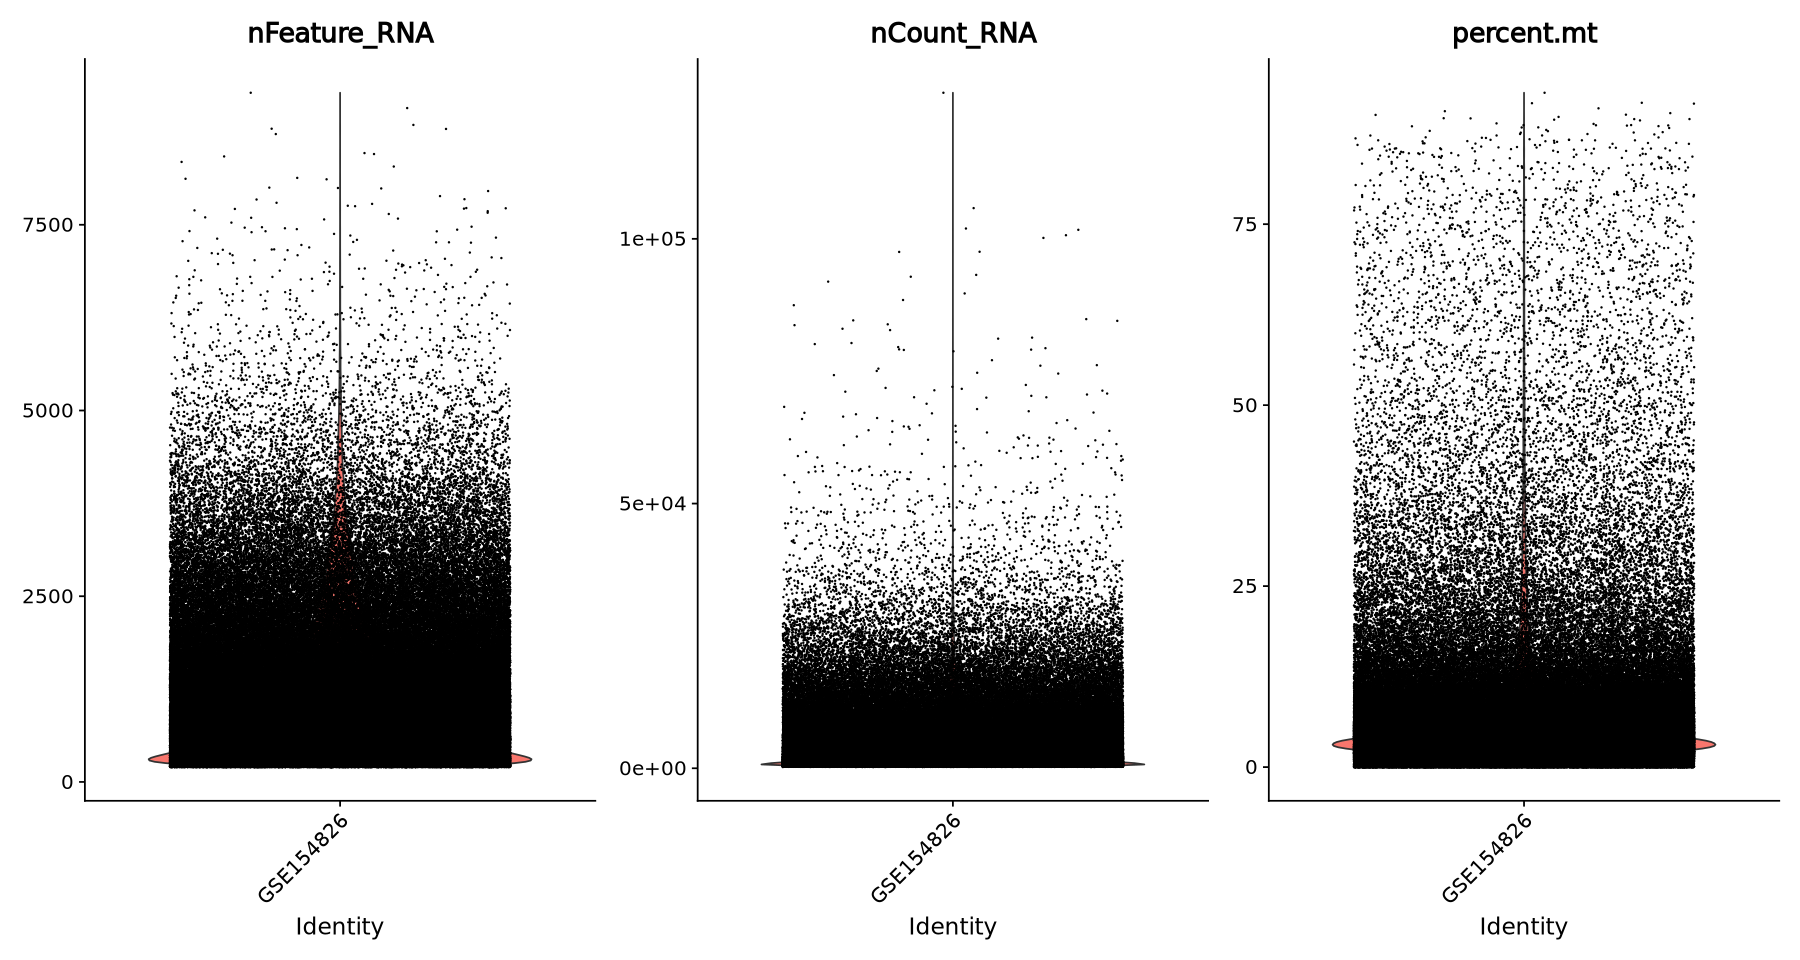

In [15]:
#QC Steps 
LUNG[["percent.mt"]] <- PercentageFeatureSet(LUNG, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(LUNG, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [16]:
#Normalise the data
LUNG <- NormalizeData(LUNG)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Normalizing layer: counts.19

Normalizing layer: counts.20

Normalizing layer: counts.21

Normalizing layer: counts.22

Normalizing layer: counts.23

Normalizing layer: counts.24

Normalizing layer: counts.25

Normalizing layer: counts.26

Normalizing layer: counts.27

Normalizing layer: counts.28

Normalizing layer: counts.29

Normalizing layer: counts.30

Normalizing layer: counts.31

Normalizing layer: counts.32

Normalizing layer: counts.33

Normalizing layer: 

In [17]:
#Find variable features
LUNG <- FindVariableFeatures(LUNG, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Finding variable features for layer counts.13

Finding variable features for layer counts.14

Finding variable features for layer counts.15

Finding variable features for layer counts.16

Finding variable features for layer counts.17

Finding variable features for layer counts.18

Finding variable features for layer counts.19

Finding variable features for layer counts.20

Finding variable features for layer counts.21

Finding variable featu

In [18]:
#Scale the data
LUNG <- ScaleData(LUNG, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [19]:
#Run PCA
LUNG <- RunPCA(LUNG, features = VariableFeatures(object = LUNG))

PC_ 1 
Positive:  WFDC2, ELF3, KRT18, CLDN4, EPCAM, AGR3, FXYD3, KRT19, AGR2, MUC1 
	   KRT8, SMIM22, CXCL17, TMC5, S100A14, MAL2, SDC1, KRT7, SLC34A2, SLPI 
	   C8orf4, HOPX, CLDN3, PIGR, SFTA2, TACSTD2, SFTPB, SFTA3, MALL, GPRC5A 
Negative:  TYROBP, LYZ, C1QA, FCER1G, C1QB, AIF1, CD68, C1QC, MS4A7, GRN 
	   FTL, APOC1, HLA-DRA, CST3, SPI1, MARCO, VSIG4, CTSS, PSAP, HLA-DQA1 
	   MNDA, HLA-DRB1, FTH1, SERPINA1, CTSB, GPX1, OLR1, MS4A4A, FBP1, GPNMB 
PC_ 2 
Positive:  CCL5, RGS1, LTB, MZB1, GZMA, CD27, CD79A, TRBC1, FKBP11, DERL3 
	   CD7, CST7, JCHAIN, IGKC, KLRB1, NKG7, TNFRSF17, PIM2, DUSP2, CTSW 
	   IGHG1, GZMH, GZMB, FCRL5, IGLC2, IGLC3, IGHG3, ITM2C, IGHA1, HERPUD1 
Negative:  AGR3, MUC1, ELF3, KRT18, EPCAM, SLPI, KRT8, WFDC2, CYB5A, CLDN4 
	   FXYD3, SLC34A2, SFTA2, C8orf4, SMIM22, KRT19, SFTA3, EMP2, PIGR, S100A14 
	   FOLR1, SFTPB, MGST1, CXCL17, NAPSA, TMC5, MAL2, SELENBP1, TACSTD2, MALL 
PC_ 3 
Positive:  SPARCL1, RAMP2, CAV1, GNG11, CLDN5, PTRF, TIMP3, CALD1, CLEC14A, MGP 

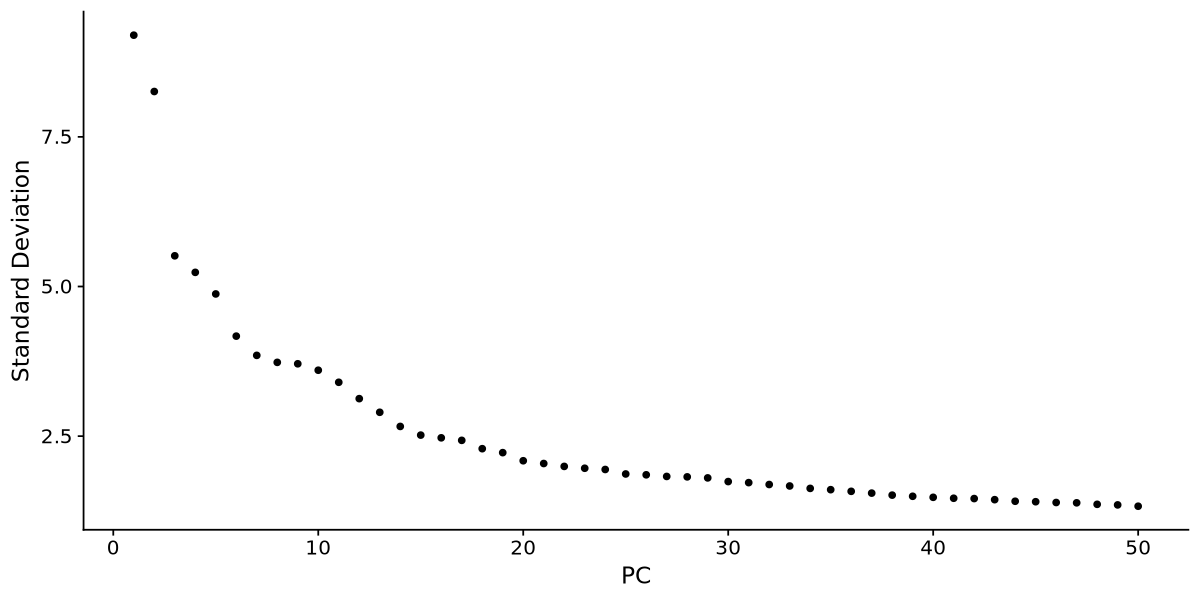

In [20]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(LUNG, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [21]:
#Find neighbours (make sure number matches no. features chosen above)
LUNG <- FindNeighbors(LUNG, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [22]:
#Run UMAP
LUNG <- RunUMAP(LUNG, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:16:36 UMAP embedding parameters a = 0.9922 b = 1.112

12:16:36 Read 250923 rows and found 40 numeric columns

12:16:36 Using Annoy for neighbor search, n_neighbors = 30

12:16:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:17:04 Writing NN index file to temp file /scratch/temp/10256012/RtmpN1LY89/file1a31695c270290

12:17:04 Searching Annoy index using 1 thread, search_k = 3000

12:19:08 Annoy recall = 100%

12:19:18 Commencing smooth kNN distance calibration using 1 thread
 wit

In [23]:
#Cluster, resolution here set to 0.2
LUNG <- FindClusters(LUNG, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 250923
Number of edges: 7867557

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9612
Number of communities: 35
Elapsed time: 163 seconds


17 singletons identified. 18 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



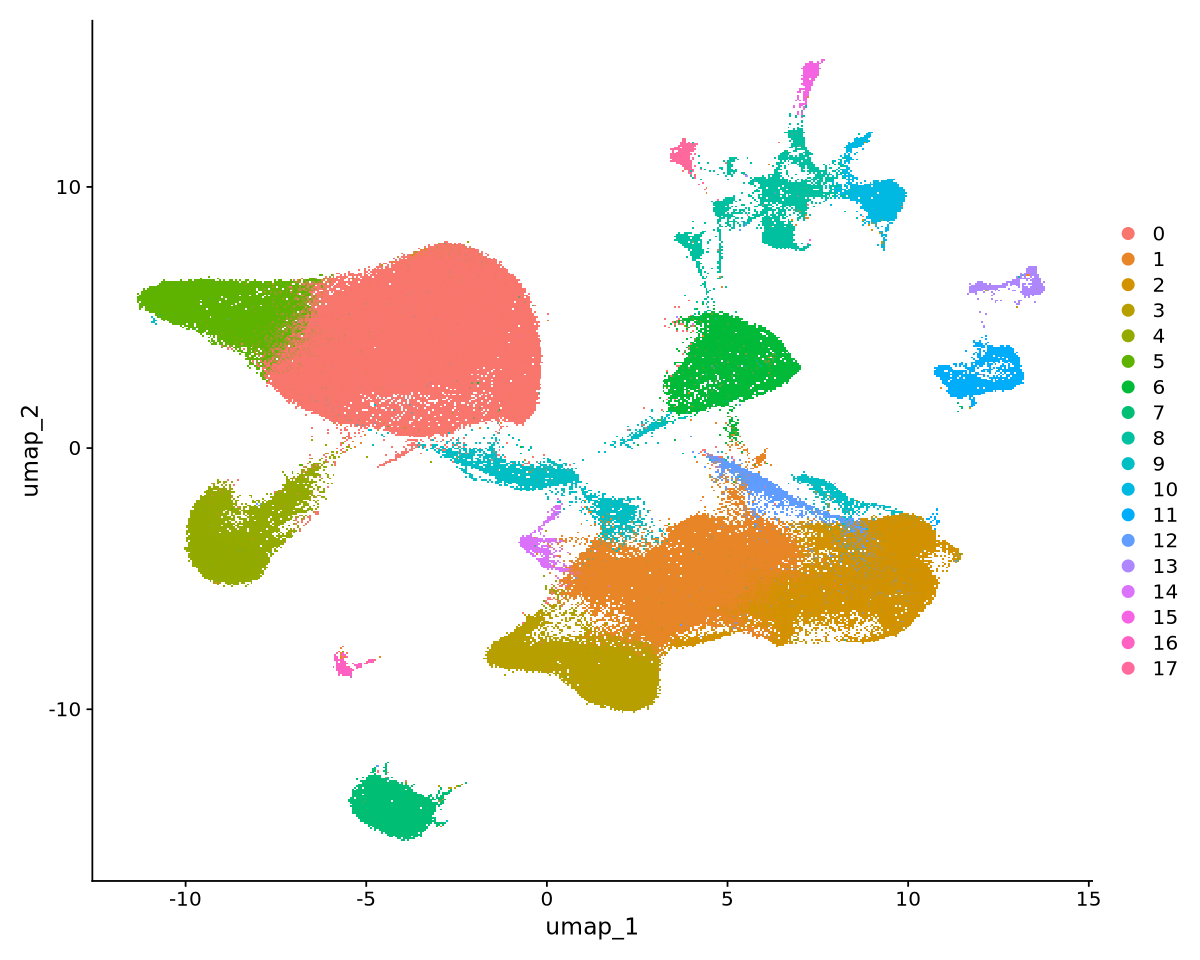

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



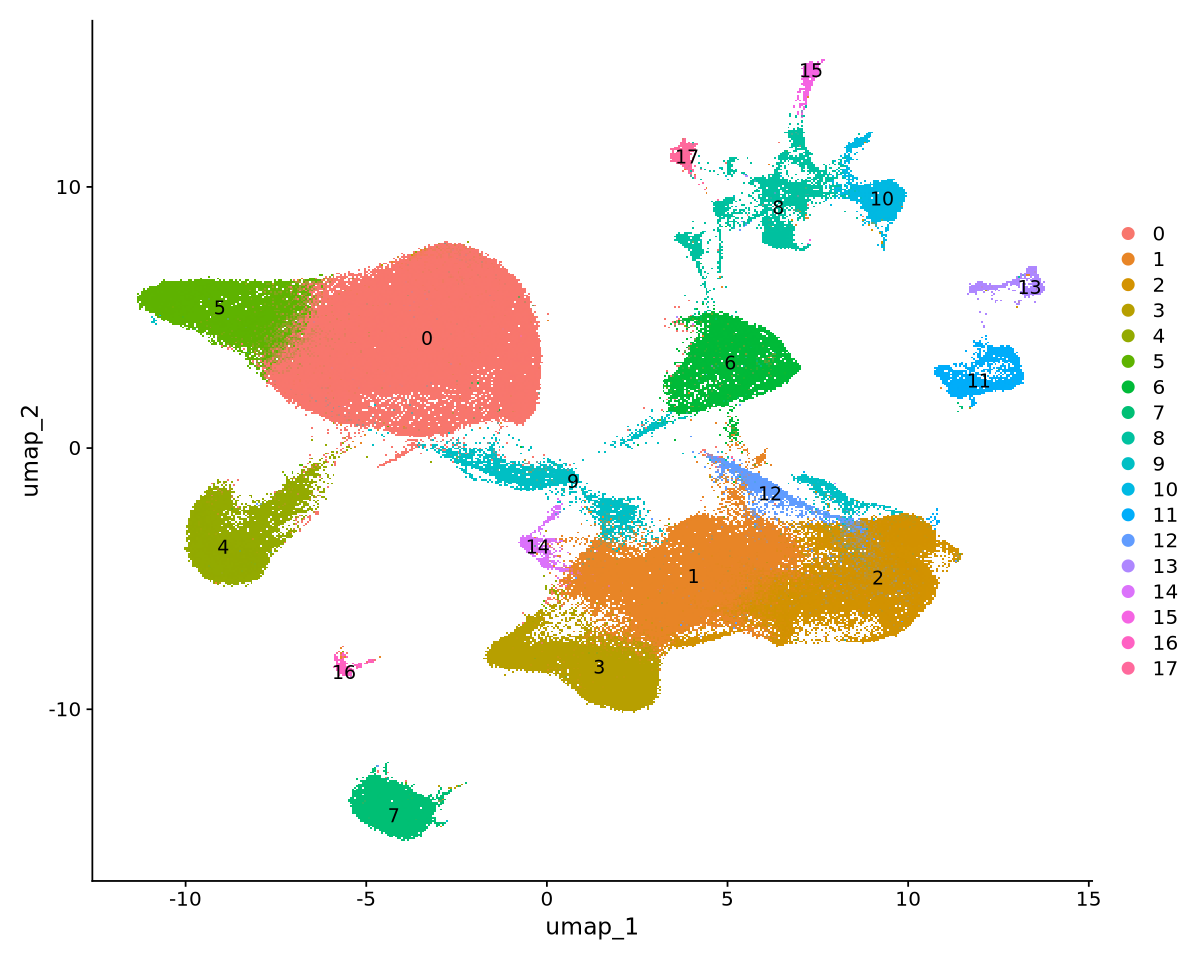

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



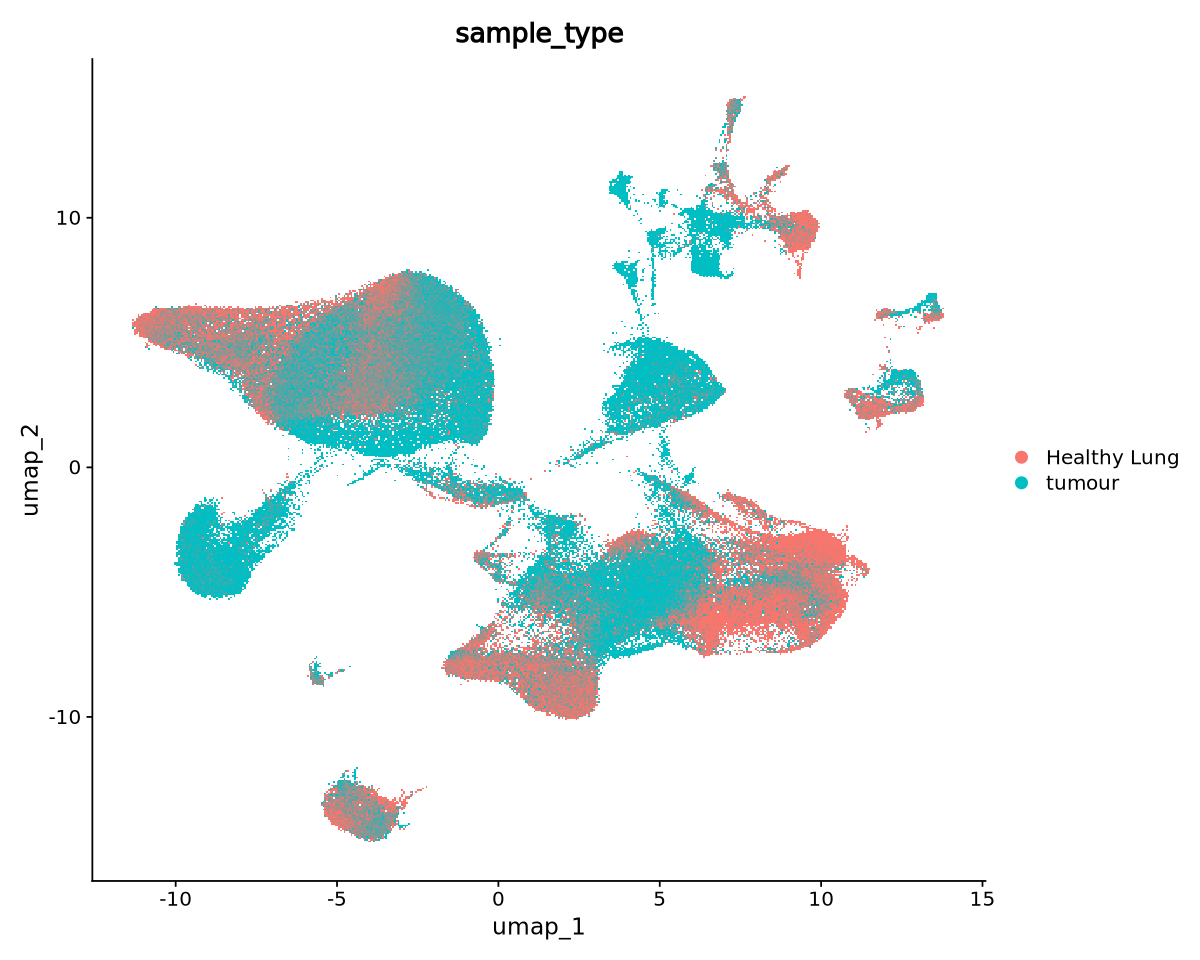

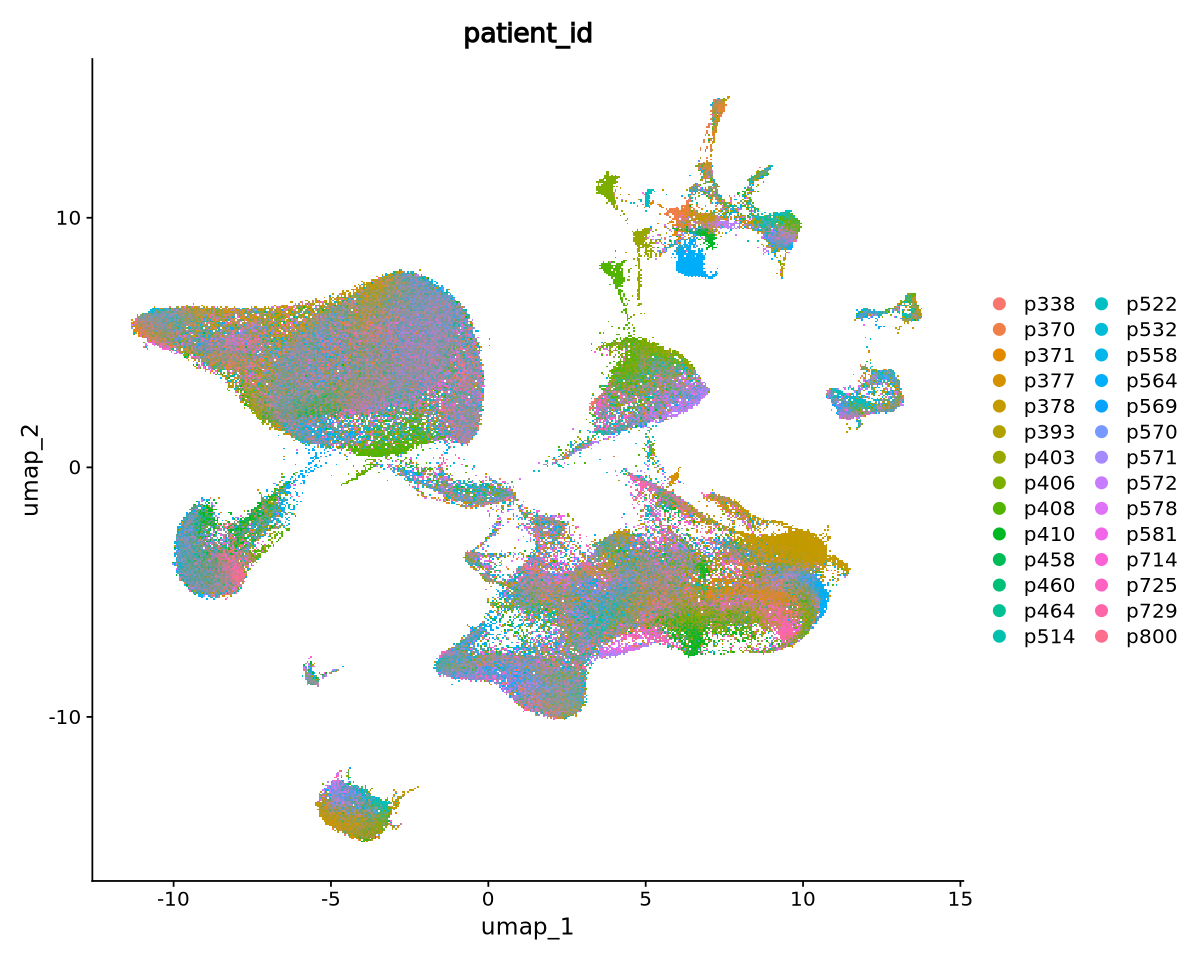

In [24]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(LUNG, reduction = "umap")
DimPlot(LUNG, reduction = "umap", label=TRUE)
DimPlot(LUNG, reduction = "umap", group = "sample_type")
DimPlot(LUNG, reduction = "umap", group = "patient_id")

In [25]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(LUNG, file = "/scratch/user/s4436039/scdata/GSE154826/GSE154826.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

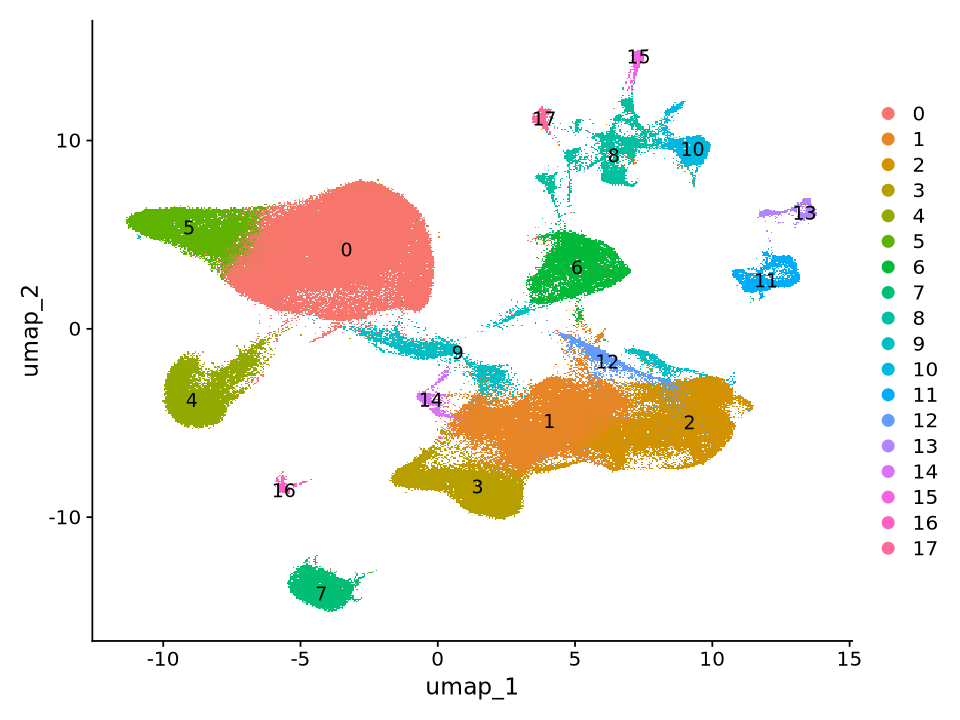

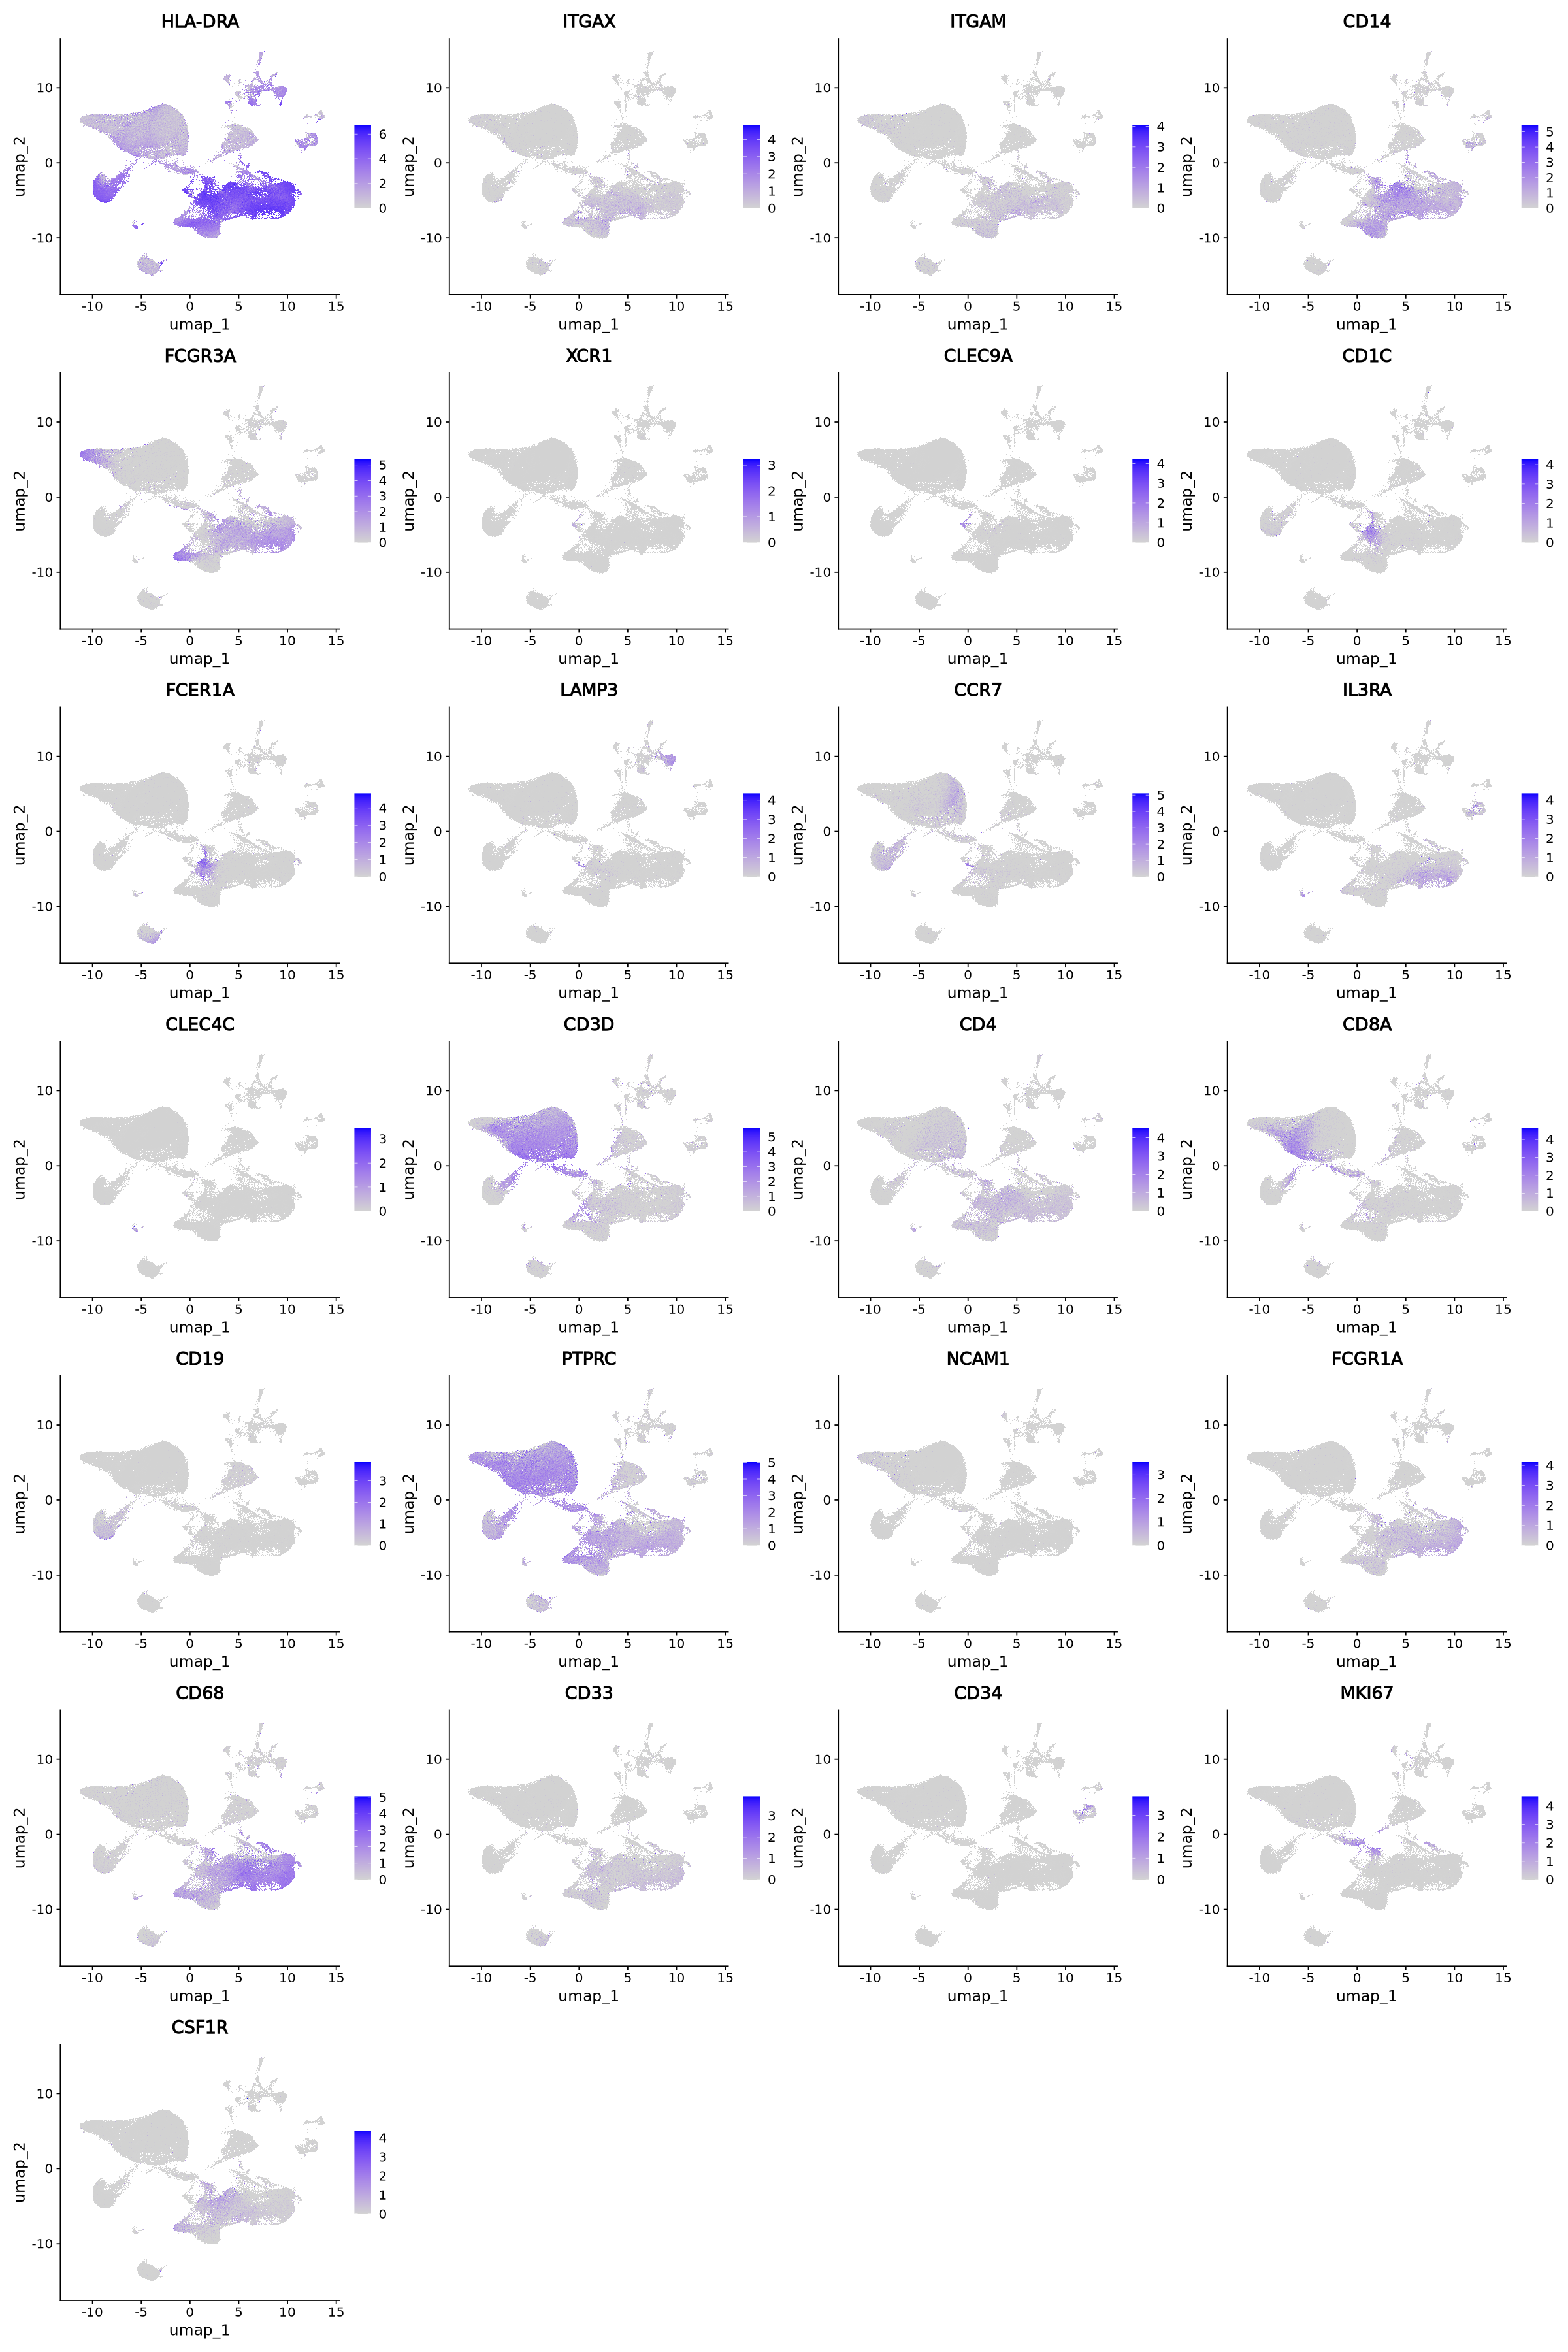

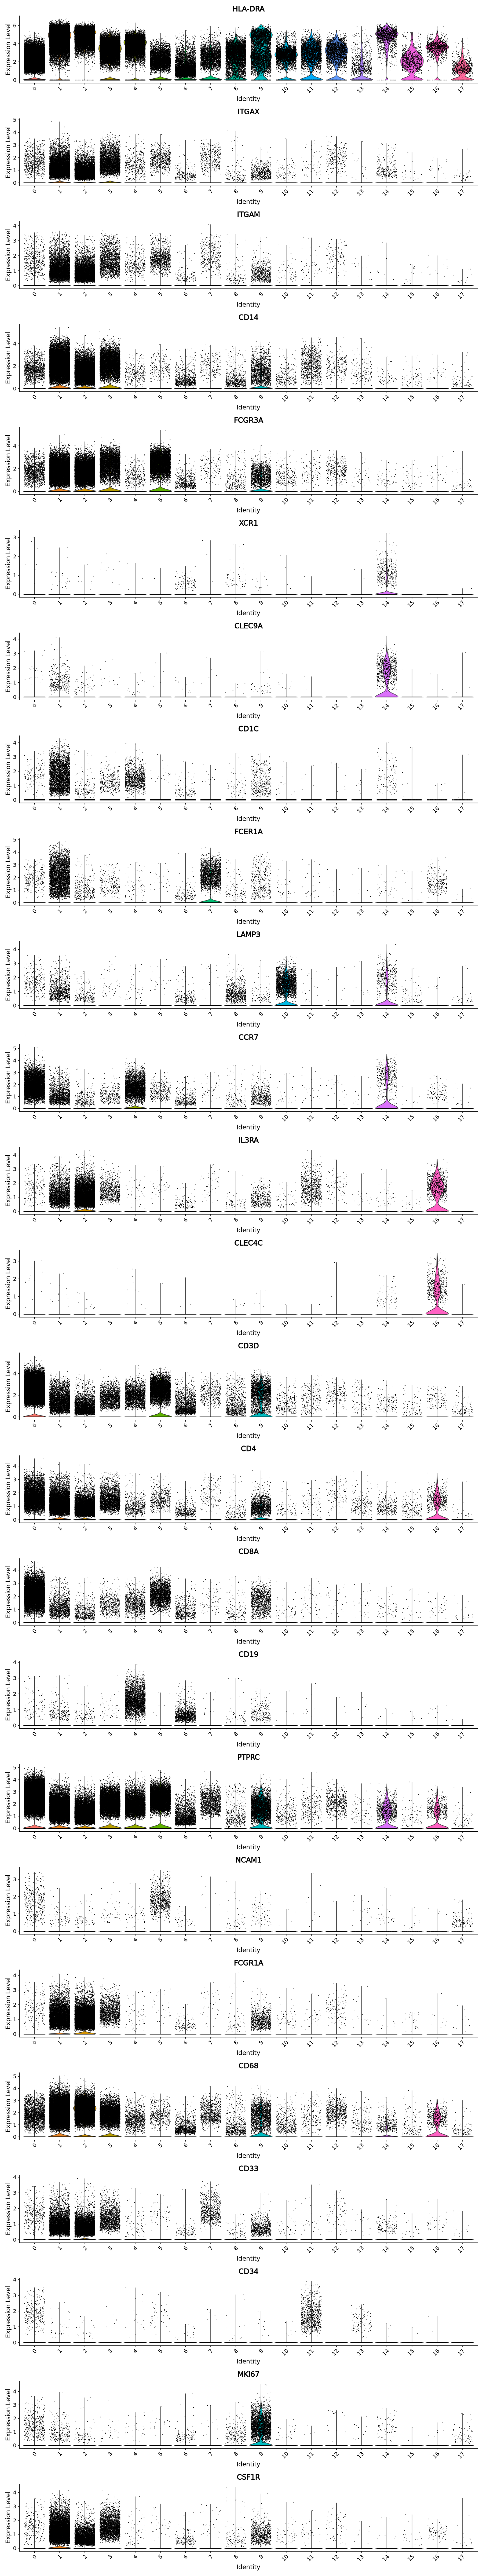

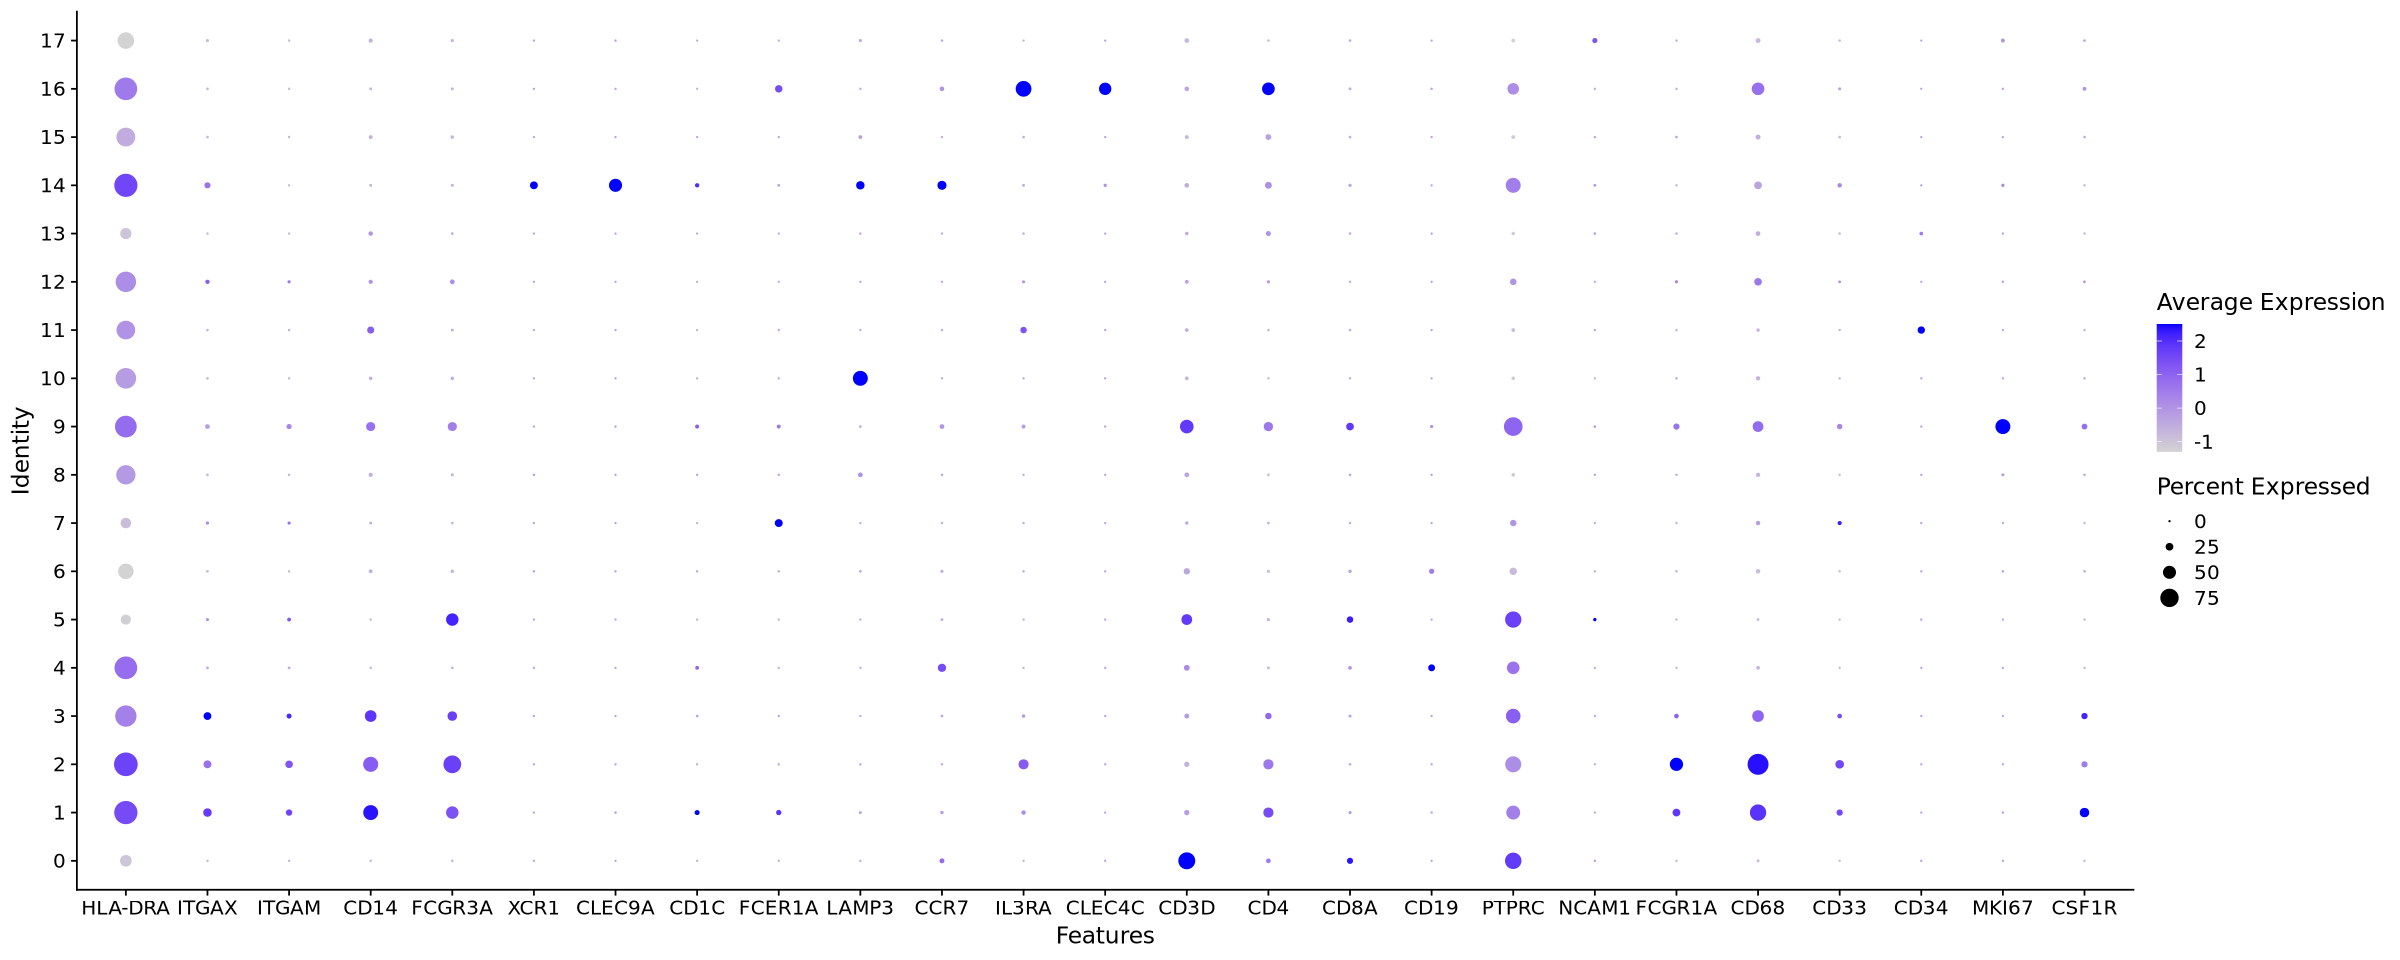

In [26]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(LUNG, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(LUNG, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(LUNG, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(LUNG, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like clusters 1,2,3,14 are the myeloid cells, now subsetting out these clusters

In [27]:
head(LUNG@meta.data)

orig.ident nCount_RNA nFeature_RNA sample_type 
GSE154826_D1_AAACCTGAGCAAATCA-1 GSE154826   2550       913         Healthy Lung
GSE154826_D1_AAACCTGAGTCTCCTC-1 GSE154826   1675       693         Healthy Lung
GSE154826_D1_AAACCTGCAAATCCGT-1 GSE154826   1204       520         Healthy Lung
GSE154826_D1_AAACCTGGTTCGAATC-1 GSE154826  16307      3146         Healthy Lung
GSE154826_D1_AAACCTGGTTGGACCC-1 GSE154826   2553       873         Healthy Lung
GSE154826_D1_AAACCTGTCATCGGAT-1 GSE154826   1624       754         Healthy Lung
                                cancer_type patient_id sample_id             
GSE154826_D1_AAACCTGAGCAAATCA-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGAGTCTCCTC-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGCAAATCCGT-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGGTTCGAATC-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGGTTGGACCC-1 Healthy     p370       GSE154826_Healthy_p370
GSE154826_D1_AAACCTGTCATCGGAT-1 Healthy     p370       GSE154826_Healthy_p370
                                site cancer_subtype sample_type_major
GSE154826_D1_AAACCTGAGCAAATCA-1 lung NA             healthy          
GSE154826_D1_AAACCTGAGTCTCCTC-1 lung NA             healthy          
GSE154826_D1_AAACCTGCAAATCCGT-1 lung NA             healthy          
GSE154826_D1_AAACCTGGTTCGAATC-1 lung NA             healthy          
GSE154826_D1_AAACCTGGTTGGACCC-1 lung NA             healthy          
GSE154826_D1_AAACCTGTCATCGGAT-1 lung NA             healthy          
                                integration_id         percent.mt
GSE154826_D1_AAACCTGAGCAAATCA-1 GSE154826_Healthy_p370 3.254902  
GSE154826_D1_AAACCTGAGTCTCCTC-1 GSE154826_Healthy_p370 1.731343  
GSE154826_D1_AAACCTGCAAATCCGT-1 GSE154826_Healthy_p370 3.820598  
GSE154826_D1_AAACCTGGTTCGAATC-1 GSE154826_Healthy_p370 3.581284  
GSE154826_D1_AAACCTGGTTGGACCC-1 GSE154826_Healthy_p370 3.956130  
GSE154826_D1_AAACCTGTCATCGGAT-1 GSE154826_Healthy_p370 3.263547  
                                RNA_snn_res.0.2 seurat_clusters
GSE154826_D1_AAACCTGAGCAAATCA-1 0               0              
GSE154826_D1_AAACCTGAGTCTCCTC-1 0               0              
GSE154826_D1_AAACCTGCAAATCCGT-1 3               3              
GSE154826_D1_AAACCTGGTTCGAATC-1 2               2              
GSE154826_D1_AAACCTGGTTGGACCC-1 7               7              
GSE154826_D1_AAACCTGTCATCGGAT-1 5               5

In [28]:
myeloid_LUNG <- subset(LUNG, subset = RNA_snn_res.0.2 %in% c("1","2","3","14"))

In [29]:
LUNG
myeloid_LUNG

An object of class Seurat 
33694 features across 250923 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 103 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, counts.35, counts.36, counts.37, counts.38, counts.39, counts.40, counts.41, counts.42, counts.43, counts.44, counts.45, counts.46, counts.47, counts.48, counts.49, counts.50, counts.51, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, data.32, data.33, 

An object of class Seurat 
33694 features across 80487 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 103 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, counts.32, counts.33, counts.34, counts.35, counts.36, counts.37, counts.38, counts.39, counts.40, counts.41, counts.42, counts.43, counts.44, counts.45, counts.46, counts.47, counts.48, counts.49, counts.50, counts.51, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, data.32, data.33, d

In [32]:
saveRDS(myeloid_LUNG, file = "/scratch/user/s4436039/scdata/GSE154826/GSE154826_myeloid.RDS")

#### Following the above then need to move entire GSE154826 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE154826/ /QRISdata/Q5935/nikita/scdata/GSE154826
```